# Categorical Data: Correspondence analysis

### Encuesta Nacional de Calidad e Impacto Gubernamental (ENCIG) 2017

In [1]:
!pip install dbfread

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install vegafusion[embed]>=1.5.0

#### Importar librerias necesarias 

In [1]:
import io
import prince
import requests
import squarify
import geopandas

import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from dbfread import DBF
from sklearn.impute import KNNImputer

In [2]:
alt.data_transformers.enable("vegafusion") # habilita el transformador de datos 'vegafusion' para trabajar con conjuntos de datos >5000 filas

DataTransformerRegistry.enable('vegafusion')

#### Cargar conjuntos de datos

In [3]:
def read_dbf_file(path):
    try:
        table = DBF(path, encoding = 'latin1', load = True) # leer archivo .dbf
        df = pd.DataFrame(iter(table)) # convertir tabla a dataframe
        print(df.keys()) # nombres de las columnas
        print(df.shape) # dimensiones del dataframe (filas, columnas)
        return df
    except Exception as e:
        print(f"An error occurred: {e}")

Tabla *encig2017_01_sec1_3_4_5_8_9_10* contiene informacion sobre los residentes de la vivienda y la identificacion de los hogares; percepcion de corrupcion; evaluacion de servicios basicos; evaluacion de servicios publicos bajo demanda; corrupcion y corrupcion general.

In [4]:
path = '/home/aspphem/Desktop/MCE/DataScience/Project/Analisis datos categoricos/encig17_base_datos_dbf/encig2017_01_sec1_3_4_5_8_9_10.dbf' # ubicacion del archivo .dbf
encig2017_01 = read_dbf_file(path)

Index(['ID_PER', 'ID_VIV', 'MUN', 'NOM_MUN', 'UPM', 'UPM_DIS', 'EST',
       'EST_DIS', 'ENT', 'NOM_ENT',
       ...
       'P9_8', 'P9_8_ESP', 'P10_1_1', 'P10_1_2', 'P10_1_3', 'P10_1_4',
       'FAC_VIV', 'FAC_P18', 'AREAM', 'NOM_AREAM'],
      dtype='object', length=230)
(39165, 230)


Tabla *encig2017_02_residentes_sec_2* contiene informacion relacionada con los integrantes del hogar principal y las caracteristicas sociodemograficas.

In [ ]:
path = '/home/aspphem/Desktop/MCE/DataScience/Project/Analisis datos categoricos/encig17_base_datos_dbf/encig2017_02_residentes_sec_2.dbf' # ubicacion del archivo .dbf
encig2017_02 = read_dbf_file(path)

Tabla *encig2017_03_sec_6* contiene informacion sobre las experiencias del informante seleccionado con los pagos, tramites y servicios publicos.

In [ ]:
path = '/home/aspphem/Desktop/MCE/DataScience/Project/Analisis datos categoricos/encig17_base_datos_dbf/encig2017_03_sec_6.dbf' # ubicacion del archivo .dbf
encig2017_03 = read_dbf_file(path)

Tabla *encig2017_04_sec_7* contiene informacion relacionada con la calidad de los tramites y de los servicios publicos realizados de manera personal por el informante seleccionado.

In [5]:
path = '/home/aspphem/Desktop/MCE/DataScience/Project/Analisis datos categoricos/encig17_base_datos_dbf/encig2017_04_sec_7.dbf' # ubicacion del archivo .dbf
encig2017_04 = read_dbf_file(path)

Index(['ID_PER', 'ID_VIV', 'ID_TRA', 'ENT', 'NOM_ENT', 'MUN', 'NOM_MUN', 'UPM',
       'V_SEL', 'R_ELE', 'N_TRA', 'UPM_DIS', 'EST_DIS', 'R_DEF', 'NT_TIPO',
       'TT_TIPO', 'P7_1', 'P7_2', 'P7_3', 'P7_3_ESP', 'P7_4_1', 'P7_4_2',
       'P7_4_3', 'P7_4_4', 'P7_4_5', 'P7_4_6', 'P7_4_7', 'P7_4_8', 'P7_4_9',
       'P7_4_10', 'P7_4_11', 'P7_5A_A', 'P7_5A_M', 'P7_5B_M', 'P7_5B_D',
       'P7_5C_D', 'P7_5D_H', 'P7_5D_M', 'P7_6', 'P7_7', 'P7_8', 'P7_9',
       'P7_10', 'P7_11', 'P7_11_3_ES', 'P7_11_ESP', 'P7_12', 'P7_12A',
       'FAC_TRA', 'AREAM', 'NOM_AREAM'],
      dtype='object')
(119036, 51)


Tabla *encig2017_05_sec_8* contiene informacion relacionada con la percepcion de corrupcion.

In [ ]:
path = '/home/aspphem/Desktop/MCE/DataScience/Project/Analisis datos categoricos/encig17_base_datos_dbf/encig2017_05_sec_8.dbf' # ubicacion del archivo .dbf
encig2017_05 = read_dbf_file(path)

Tabla *encig2017_01_sec_11* contiene informacion relacionada con la confianza en las instituciones y actores diversos.

In [6]:
path = '/home/aspphem/Desktop/MCE/DataScience/Project/Analisis datos categoricos/encig17_base_datos_dbf/encig2017_01_sec_11.dbf' # ubicacion del archivo .dbf
encig2017_06 = read_dbf_file(path)

Index(['ID_PER', 'ID_VIV', 'MUN', 'NOM_MUN', 'UPM', 'UPM_DIS', 'EST',
       'EST_DIS', 'ENT', 'NOM_ENT', 'PRO_VIV', 'V_SEL', 'R_DEF', 'FECHA_CAPT',
       'P11_1_1', 'P11_1_2', 'P11_1_3', 'P11_1_4', 'P11_1_5', 'P11_1_6',
       'P11_1_7', 'P11_1_8', 'P11_1_9', 'P11_1_10', 'P11_1_11', 'P11_1_12',
       'P11_1_13', 'P11_1_14', 'P11_1_15', 'P11_1_16', 'P11_1_17', 'P11_1_18',
       'P11_1_19', 'P11_1_20', 'P11_1_21', 'P11_1_22', 'P11_1A_1', 'P11_1A_2',
       'P11_1A_3', 'P11_1A_4', 'P11_1A_5', 'P11_1A_6', 'P11_1A_7', 'P11_1A_8',
       'P11_1A_9', 'P11_1A_10', 'P11_1A_11', 'P11_1A_12', 'P11_1A_13',
       'P11_1A_14', 'P11_1A_15', 'P11_1A_16', 'P11_1A_17', 'P11_1A_18',
       'P11_1A_19', 'P11_1A_20', 'P11_1A_21', 'P11_1A_22', 'FAC_VIV',
       'FAC_P18', 'AREAM', 'NOM_AREAM'],
      dtype='object')
(39165, 62)


#### Estructura del conjunto de datos

In [7]:
encig2017_01.head() # primeras 5 filas del conjunto de datos

,ID_PER,ID_VIV,MUN,NOM_MUN,UPM,UPM_DIS,EST,EST_DIS,ENT,NOM_ENT,...,P9_8,P9_8_ESP,P10_1_1,P10_1_2,P10_1_3,P10_1_4,FAC_VIV,FAC_P18,AREAM,NOM_AREAM
0,01.0100026.01.03,01.0100026.01,001,Aguascalientes,0100026,00010,3,0020,01,Aguascalientes,...,01,,2,2,2,2,167,502,14,AGUASCALIENTES
1,01.0100026.03.01,01.0100026.03,001,Aguascalientes,0100026,00010,3,0020,01,Aguascalientes,...,08,,2,2,2,2,167,334,14,AGUASCALIENTES
2,01.0100026.04.02,01.0100026.04,001,Aguascalientes,0100026,00010,3,0020,01,Aguascalientes,...,08,,2,2,2,2,167,502,14,AGUASCALIENTES
3,01.0100026.05.01,01.0100026.05,001,Aguascalientes,0100026,00010,3,0020,01,Aguascalientes,...,,,2,2,2,2,167,167,14,AGUASCALIENTES
4,01.0100027.01.02,01.0100027.01,001,Aguascalientes,0100027,00020,3,0020,01,Aguascalientes,...,,,2,1,1,2,159,635,14,AGUASCALIENTES


In [8]:
encig2017_01.tail() # ultimas 5 filas del conjunto de datos

,ID_PER,ID_VIV,MUN,NOM_MUN,UPM,UPM_DIS,EST,EST_DIS,ENT,NOM_ENT,...,P9_8,P9_8_ESP,P10_1_1,P10_1_2,P10_1_3,P10_1_4,FAC_VIV,FAC_P18,AREAM,NOM_AREAM
39160,32.3201157.05.01,32.3201157.05,056,Zacatecas,3201157,91380,2,3530,32,Zacatecas,...,,,2,1,2,1,61,122,32,ZACATECAS
39161,32.3201162.01.01,32.3201162.01,056,Zacatecas,3201162,91390,4,3550,32,Zacatecas,...,,,1,1,2,1,177,355,32,ZACATECAS
39162,32.3201162.02.01,32.3201162.02,056,Zacatecas,3201162,91390,4,3550,32,Zacatecas,...,,,2,2,2,2,177,177,32,ZACATECAS
39163,32.3201162.04.02,32.3201162.04,056,Zacatecas,3201162,91390,4,3550,32,Zacatecas,...,,,2,2,2,2,177,709,32,ZACATECAS
39164,32.3201162.05.01,32.3201162.05,056,Zacatecas,3201162,91390,4,3550,32,Zacatecas,...,,,2,2,2,2,177,355,32,ZACATECAS


In [9]:
encig2017_01.info() # informacion del conjunto de datos principal: no. entradas, no. columnas, tipos de datos, uso de memoria   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39165 entries, 0 to 39164
Columns: 230 entries, ID_PER to NOM_AREAM
dtypes: object(230)
memory usage: 68.7+ MB


In [10]:
encig2017_01.dtypes # tipos de datos para cada columna

ID_PER       object
ID_VIV       object
MUN          object
NOM_MUN      object
UPM          object
              ...  
P10_1_4      object
FAC_VIV      object
FAC_P18      object
AREAM        object
NOM_AREAM    object
Length: 230, dtype: object

In [11]:
encig2017_01.isnull().values.any() # comprobar si existe algun valor NaN en el dataframe

False

In [12]:
null_values = encig2017_01.isnull().sum()
encig2017_01.loc[:, null_values > 0] # filtrar columnas que tengan al menos un valor NaN

""
0
1
2
3
4
...
39160
39161
39162
39163


In [13]:
null_values = encig2017_01.isnull().sum(axis = 1)
encig2017_01[null_values > 0] # filtrar filas que tengan al menos un valor NaN

,ID_PER,ID_VIV,MUN,NOM_MUN,UPM,UPM_DIS,EST,EST_DIS,ENT,NOM_ENT,...,P9_8,P9_8_ESP,P10_1_1,P10_1_2,P10_1_3,P10_1_4,FAC_VIV,FAC_P18,AREAM,NOM_AREAM


In [14]:
encig2017_01['NOM_ENT'].nunique() # verificar el no. de estados registrados en la base de datos

32

In [15]:
encig2017_01['NOM_ENT'].value_counts() # no. de encuestados por entidad federativa

NOM_ENT
Ciudad de México                   4949
Sonora                             1554
Guerrero                           1454
Coahuila de Zaragoza               1422
Aguascalientes                     1419
Colima                             1379
Nuevo León                         1379
Tamaulipas                         1309
Durango                            1307
México                             1291
Morelos                            1281
Baja California Sur                1116
Querétaro                          1112
Hidalgo                            1066
Guanajuato                         1015
Nayarit                             979
Campeche                            974
Jalisco                             972
Zacatecas                           968
Oaxaca                              962
Sinaloa                             962
Tlaxcala                            957
Puebla                              956
Chiapas                             947
Chihuahua                       

#### Procesamiento del conjunto de datos

Tabla del hogar principal y de características del elegido: **secciones 1, 3, 4, 5, 8, 9, y 10.**

In [7]:
sec_1_3_4_5_8_9_10 = encig2017_01.convert_dtypes().copy() # convertir datos para facilitar su manejo
sec_1_3_4_5_8_9_10.dtypes

ID_PER       string[python]
ID_VIV       string[python]
MUN          string[python]
NOM_MUN      string[python]
UPM          string[python]
                  ...      
P10_1_4      string[python]
FAC_VIV      string[python]
FAC_P18      string[python]
AREAM        string[python]
NOM_AREAM    string[python]
Length: 230, dtype: object

In [8]:
sec_1_3_4_5_8_9_10.shape

(39165, 230)

In [9]:
sec_1_3_4_5_8_9_10['NOM_ENT'] = sec_1_3_4_5_8_9_10['NOM_ENT'].replace({'Aguascalientes': 'AGS', 'Baja California': 'BC', 'Baja California Sur': 'BCS', 'Campeche': 'CAMP', 'Coahuila de Zaragoza': 'COAH', 
                                       'Colima': 'COL', 'Chiapas': 'CHIS', 'Chihuahua': 'CHIH', 'Ciudad de México': 'CDMX', 'Durango': 'DGO', 
                                       'Guanajuato': 'GTO', 'Guerrero': 'GRO', 'Hidalgo': 'HGO', 'Jalisco': 'JAL', 'México': 'MEX', 
                                       'Michoacán de Ocampo': 'MICH', 'Morelos': 'MOR', 'Nayarit': 'NAY', 'Nuevo León': 'NL', 'Oaxaca': 'OAX', 
                                       'Puebla': 'PUE', 'Querétaro': 'QRO', 'Quintana Roo': 'QR', 'San Luis Potosí': 'SLP', 'Sinaloa': 'SIN', 
                                       'Sonora': 'SON', 'Tabasco': 'TAB', 'Tamaulipas': 'TAM', 'Tlaxcala': 'TLAX', 'Veracruz de Ignacio de la Llave': 'VER', 
                                       'Yucatán': 'YUC', 'Zacatecas': 'ZAC'}) # abreviar los nombres de las entidades federativas
sec_1_3_4_5_8_9_10['NOM_ENT'].unique()

<StringArray>
[ 'AGS',   'BC',  'BCS', 'CAMP', 'COAH',  'COL', 'CHIS', 'CHIH', 'CDMX',
  'DGO',  'GTO',  'GRO',  'HGO',  'JAL',  'MEX', 'MICH',  'MOR',  'NAY',
   'NL',  'OAX',  'PUE',  'QRO',   'QR',  'SLP',  'SIN',  'SON',  'TAB',
  'TAM', 'TLAX',  'VER',  'YUC',  'ZAC']
Length: 32, dtype: string

In [10]:
sec_1_3_4_5_8_9_10['ENT'].unique()

<StringArray>
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
 '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
 '27', '28', '29', '30', '31', '32']
Length: 32, dtype: string

In [11]:
sec_1_3_4_5_8_9_10.describe() # estadisticos generales del conjunto de datos

,ID_PER,ID_VIV,MUN,NOM_MUN,UPM,UPM_DIS,EST,EST_DIS,ENT,NOM_ENT,...,P9_8,P9_8_ESP,P10_1_1,P10_1_2,P10_1_3,P10_1_4,FAC_VIV,FAC_P18,AREAM,NOM_AREAM
count,39165,39165,39165,39165,39165,39165,39165,39165,39165,39165,...,39165,39165,39165,39165,39165,39165,39165,39165,39165,39165
unique,39165,39165,112,239,9139,9139,4,357,32,32,...,11,439,3,3,3,3,1517,4466,33,33
top,01.0100026.01.03,01.0100026.01,001,Aguascalientes,1301418,43460,2,0860,09,CDMX,...,,,2,2,2,2,128,256,00,RESTO DE CIUDADES DE 100 MIL HABITANTES Y MÁS
freq,1,1,2679,1345,10,10,17901,2220,4949,4949,...,30013,38419,33088,32863,35605,36855,172,65,9878,9878


Tabla de confianza en las instituciones:  **sección 11**

In [12]:
sec_11 = encig2017_06.convert_dtypes().copy() # convertir datos para facilitar su manejo
sec_11.dtypes

ID_PER       string[python]
ID_VIV       string[python]
MUN          string[python]
NOM_MUN      string[python]
UPM          string[python]
                  ...      
P11_1A_22    string[python]
FAC_VIV      string[python]
FAC_P18      string[python]
AREAM        string[python]
NOM_AREAM    string[python]
Length: 62, dtype: object

In [13]:
sec_11.shape

(39165, 62)

In [14]:
sec_11['NOM_ENT'] = sec_11['NOM_ENT'].replace({'Aguascalientes': 'AGS', 'Baja California': 'BC', 'Baja California Sur': 'BCS', 'Campeche': 'CAMP', 'Coahuila de Zaragoza': 'COAH', 
                                       'Colima': 'COL', 'Chiapas': 'CHIS', 'Chihuahua': 'CHIH', 'Ciudad de México': 'CDMX', 'Durango': 'DGO', 
                                       'Guanajuato': 'GTO', 'Guerrero': 'GRO', 'Hidalgo': 'HGO', 'Jalisco': 'JAL', 'México': 'MEX', 
                                       'Michoacán de Ocampo': 'MICH', 'Morelos': 'MOR', 'Nayarit': 'NAY', 'Nuevo León': 'NL', 'Oaxaca': 'OAX', 
                                       'Puebla': 'PUE', 'Querétaro': 'QRO', 'Quintana Roo': 'QR', 'San Luis Potosí': 'SLP', 'Sinaloa': 'SIN', 
                                       'Sonora': 'SON', 'Tabasco': 'TAB', 'Tamaulipas': 'TAM', 'Tlaxcala': 'TLAX', 'Veracruz de Ignacio de la Llave': 'VER', 
                                       'Yucatán': 'YUC', 'Zacatecas': 'ZAC'}) # abreviar los nombres de las entidades federativas
sec_11['NOM_ENT'].unique()

<StringArray>
[ 'AGS',   'BC',  'BCS', 'CAMP', 'COAH',  'COL', 'CHIS', 'CHIH', 'CDMX',
  'DGO',  'GTO',  'GRO',  'HGO',  'JAL',  'MEX', 'MICH',  'MOR',  'NAY',
   'NL',  'OAX',  'PUE',  'QRO',   'QR',  'SLP',  'SIN',  'SON',  'TAB',
  'TAM', 'TLAX',  'VER',  'YUC',  'ZAC']
Length: 32, dtype: string

In [15]:
sec_11.describe() # estadisticos generales del conjunto de datos

,ID_PER,ID_VIV,MUN,NOM_MUN,UPM,UPM_DIS,EST,EST_DIS,ENT,NOM_ENT,...,P11_1A_17,P11_1A_18,P11_1A_19,P11_1A_20,P11_1A_21,P11_1A_22,FAC_VIV,FAC_P18,AREAM,NOM_AREAM
count,39165,39165,39165,39165,39165,39165,39165,39165,39165,39165,...,39165,39165,39165,39165,39165,39165,39165,39165,39165,39165
unique,39165,39165,112,239,9139,9139,4,357,32,32,...,11,11,11,11,11,12,1517,4466,33,33
top,01.0100026.01.03,01.0100026.01,001,Aguascalientes,1301418,43460,2,0860,09,CDMX,...,01,08,01,08,01,07,128,256,00,RESTO DE CIUDADES DE 100 MIL HABITANTES Y MÁS
freq,1,1,2679,1345,10,10,17901,2220,4949,4949,...,7475,8128,14663,8756,9384,6159,172,65,9878,9878


Tabla de seguimiento de trámites, pagos o servicios públicos: **sección 7**

In [16]:
sec_7 = encig2017_04.convert_dtypes().copy() # convertir datos para facilitar su manejo
sec_7.dtypes

ID_PER        string[python]
ID_VIV        string[python]
ID_TRA        string[python]
ENT           string[python]
NOM_ENT       string[python]
MUN           string[python]
NOM_MUN       string[python]
UPM           string[python]
V_SEL         string[python]
R_ELE         string[python]
N_TRA         string[python]
UPM_DIS       string[python]
EST_DIS       string[python]
R_DEF         string[python]
NT_TIPO       string[python]
TT_TIPO       string[python]
P7_1          string[python]
P7_2          string[python]
P7_3          string[python]
P7_3_ESP      string[python]
P7_4_1        string[python]
P7_4_2        string[python]
P7_4_3        string[python]
P7_4_4        string[python]
P7_4_5        string[python]
P7_4_6        string[python]
P7_4_7        string[python]
P7_4_8        string[python]
P7_4_9        string[python]
P7_4_10       string[python]
P7_4_11       string[python]
P7_5A_A       string[python]
P7_5A_M       string[python]
P7_5B_M       string[python]
P7_5B_D       

In [17]:
sec_7.shape

(119036, 51)

In [18]:
sec_7['NOM_ENT'] = sec_7['NOM_ENT'].replace({'Aguascalientes': 'AGS', 'Baja California': 'BC', 'Baja California Sur': 'BCS', 'Campeche': 'CAMP', 'Coahuila de Zaragoza': 'COAH', 
                                             'Colima': 'COL', 'Chiapas': 'CHIS', 'Chihuahua': 'CHIH', 'Ciudad de México': 'CDMX', 'Durango': 'DGO', 
                                             'Guanajuato': 'GTO', 'Guerrero': 'GRO', 'Hidalgo': 'HGO', 'Jalisco': 'JAL', 'México': 'MEX', 
                                             'Michoacán de Ocampo': 'MICH', 'Morelos': 'MOR', 'Nayarit': 'NAY', 'Nuevo León': 'NL', 'Oaxaca': 'OAX', 
                                             'Puebla': 'PUE', 'Querétaro': 'QRO', 'Quintana Roo': 'QR', 'San Luis Potosí': 'SLP', 'Sinaloa': 'SIN', 
                                             'Sonora': 'SON', 'Tabasco': 'TAB', 'Tamaulipas': 'TAM', 'Tlaxcala': 'TLAX', 'Veracruz de Ignacio de la Llave': 'VER', 
                                             'Yucatán': 'YUC', 'Zacatecas': 'ZAC'}) # abreviar los nombres de las entidades federativas
sec_7['NOM_ENT'].unique()

<StringArray>
[ 'AGS',   'BC',  'BCS', 'CAMP', 'COAH',  'COL', 'CHIS', 'CHIH', 'CDMX',
  'DGO',  'GTO',  'GRO',  'HGO',  'JAL',  'MEX', 'MICH',  'MOR',  'NAY',
   'NL',  'OAX',  'PUE',  'QRO',   'QR',  'SLP',  'SIN',  'SON',  'TAB',
  'TAM', 'TLAX',  'VER',  'YUC',  'ZAC']
Length: 32, dtype: string

In [19]:
sec_7.describe() # estadisticos generales del conjunto de datos

,ID_PER,ID_VIV,ID_TRA,ENT,NOM_ENT,MUN,NOM_MUN,UPM,V_SEL,R_ELE,...,P7_9,P7_10,P7_11,P7_11_3_ES,P7_11_ESP,P7_12,P7_12A,FAC_TRA,AREAM,NOM_AREAM
count,119036,119036,119036,119036,119036,119036,119036,119036,119036,119036,...,119036,119036,119036,119036,119036,119036,119036,119036,119036,119036
unique,33338,33338,107646,32,32,112,239,9096,10,10,...,4,4,6,35,26,8,12,13595,33,33
top,10.1000748.05.01,10.1000748.05,31.3100765.05.01.10,09,CDMX,001,Aguascalientes,1000748,05,01,...,2,,,,,2,09,256,00,RESTO DE CIUDADES DE 100 MIL HABITANTES Y MÁS
freq,38,38,3,12519,12519,8726,4907,63,23972,67453,...,98246,103926,115928,118998,119008,64766,33975,175,29613,29613


## Principales Problemáticas de Cada Entidad Federativa en la República Mexicana

In [48]:
columns = list(range(20, 32)) # columnas de interes: problemas a los que se enfrentan los estados

In [49]:
updated_names = ['Desempeno_Gub', 'Pobreza', 'Corrupcion', 'Desempleo', 'Inseguridad', 
                'Aplicacion_Ley', 'Desastres_Naturales', 'Educacion', 'Salud', 'Coordinacion_Gub', 
                'Rendicion_Cuentas', 'Ninguno', 'Entidad_Federativa'] # redefinir nombre de las variables de acuerdo al diccionario de datos de la base de datos

In [50]:
country_main_issues = sec_1_3_4_5_8_9_10.iloc[:, columns].astype(int).copy() # conversion de string a int
country_main_issues['NOM_ENT'] = sec_1_3_4_5_8_9_10['NOM_ENT'] # agregar columna con los nombres de las entidades federativas actualizados
country_main_issues.columns = updated_names # actualizar el nombre de las variables
country_main_issues.head()

,Desempeno_Gub,Pobreza,Corrupcion,Desempleo,Inseguridad,Aplicacion_Ley,Desastres_Naturales,Educacion,Salud,Coordinacion_Gub,Rendicion_Cuentas,Ninguno,Entidad_Federativa
0,1,1,0,0,1,0,0,0,0,0,0,0,AGS
1,0,0,0,0,0,1,0,0,1,0,1,0,AGS
2,0,0,1,0,0,0,0,0,0,1,1,0,AGS
3,1,1,0,0,1,0,0,0,0,0,0,0,AGS
4,0,0,1,0,0,0,0,0,0,1,1,0,AGS


In [51]:
country_main_issues.dtypes # verificar los tipos de datos del dataframe  

Desempeno_Gub                   int64
Pobreza                         int64
Corrupcion                      int64
Desempleo                       int64
Inseguridad                     int64
Aplicacion_Ley                  int64
Desastres_Naturales             int64
Educacion                       int64
Salud                           int64
Coordinacion_Gub                int64
Rendicion_Cuentas               int64
Ninguno                         int64
Entidad_Federativa     string[python]
dtype: object

In [52]:
contingency_table_main_issues = country_main_issues.groupby('Entidad_Federativa').sum() # agrupar observaciones por estado 
contingency_table_main_issues.head()

,Desempeno_Gub,Pobreza,Corrupcion,Desempleo,Inseguridad,Aplicacion_Ley,Desastres_Naturales,Educacion,Salud,Coordinacion_Gub,Rendicion_Cuentas,Ninguno
Entidad_Federativa,,,,,,,,,,,,
AGS,554,512,665,542,974,246,10,169,308,162,81,6
BC,403,288,550,171,733,156,17,106,178,112,70,2
BCS,516,219,648,217,995,248,40,71,148,146,49,0
CAMP,273,329,450,608,543,130,24,104,323,96,36,1
CDMX,2247,1442,3012,1613,3622,816,206,581,568,433,259,2


In [53]:
contingency_table_main_issues.shape

(32, 12)

#### Percepción de la Ocurrencia de las Principales Problemáticas en la República Mexicana

In [54]:
main_issues = ['Desempeño Gubernamental', 'Pobreza', 'Corrupción', 'Desempleo', 'Inseguridad', 
                'Mala Aplicación de la Ley', 'Medio Ambiente', 'Educación', 'Salud', 'Coordinación Gubernamental', 
                'Rendición de Cuentas', 'Ninguno'] # problematicas principales que enfrentan las entidades federativas
frecuency_main_issues = contingency_table_main_issues.copy()
frecuency_main_issues.columns = main_issues # redefinir las columnas para mejor la legibilidad de los graficos
frecuency_main_issues = frecuency_main_issues.reset_index()

In [55]:
frecuency_main_issues.head()

,Entidad_Federativa,Desempeño Gubernamental,Pobreza,Corrupción,Desempleo,Inseguridad,Mala Aplicación de la Ley,Medio Ambiente,Educación,Salud,Coordinación Gubernamental,Rendición de Cuentas,Ninguno
0,AGS,554,512,665,542,974,246,10,169,308,162,81,6
1,BC,403,288,550,171,733,156,17,106,178,112,70,2
2,BCS,516,219,648,217,995,248,40,71,148,146,49,0
3,CAMP,273,329,450,608,543,130,24,104,323,96,36,1
4,CDMX,2247,1442,3012,1613,3622,816,206,581,568,433,259,2


In [56]:
frecuency_main_issues = pd.melt(frecuency_main_issues, id_vars=['Entidad_Federativa'], value_vars = main_issues,
                                var_name = 'Ploblematica', value_name = 'Frecuencia')
frecuency_main_issues

,Entidad_Federativa,Ploblematica,Frecuencia
0,AGS,Desempeño Gubernamental,554
1,BC,Desempeño Gubernamental,403
2,BCS,Desempeño Gubernamental,516
3,CAMP,Desempeño Gubernamental,273
4,CDMX,Desempeño Gubernamental,2247
...,...,...,...
379,TAM,Ninguno,3
380,TLAX,Ninguno,8
381,VER,Ninguno,2
382,YUC,Ninguno,12


In [57]:
frecuency_main_issues['Ploblematica'].unique() # problematicas principales que enfrentan las entidades federativas

array(['Desempeño Gubernamental', 'Pobreza', 'Corrupción', 'Desempleo',
       'Inseguridad', 'Mala Aplicación de la Ley', 'Medio Ambiente',
       'Educación', 'Salud', 'Coordinación Gubernamental',
       'Rendición de Cuentas', 'Ninguno'], dtype=object)

In [58]:
frecuency_main_issues['Entidad_Federativa'].unique() # entidades federativas

<StringArray>
[ 'AGS',   'BC',  'BCS', 'CAMP', 'CDMX', 'CHIH', 'CHIS', 'COAH',  'COL',
  'DGO',  'GRO',  'GTO',  'HGO',  'JAL',  'MEX', 'MICH',  'MOR',  'NAY',
   'NL',  'OAX',  'PUE',   'QR',  'QRO',  'SIN',  'SLP',  'SON',  'TAB',
  'TAM', 'TLAX',  'VER',  'YUC',  'ZAC']
Length: 32, dtype: string

In [59]:
frecuency_by_states = frecuency_main_issues.drop(['Entidad_Federativa'], axis = 1).groupby(['Ploblematica']).sum().reset_index().copy()
frecuency_by_states

,Ploblematica,Frecuencia
0,Coordinación Gubernamental,3648
1,Corrupción,21520
2,Desempeño Gubernamental,15092
3,Desempleo,13699
4,Educación,4322
5,Inseguridad,27869
6,Mala Aplicación de la Ley,5981
7,Medio Ambiente,1054
8,Ninguno,132
9,Pobreza,12848


#### Distribución Visual de las Principales Problemáticas en la República Mexicana

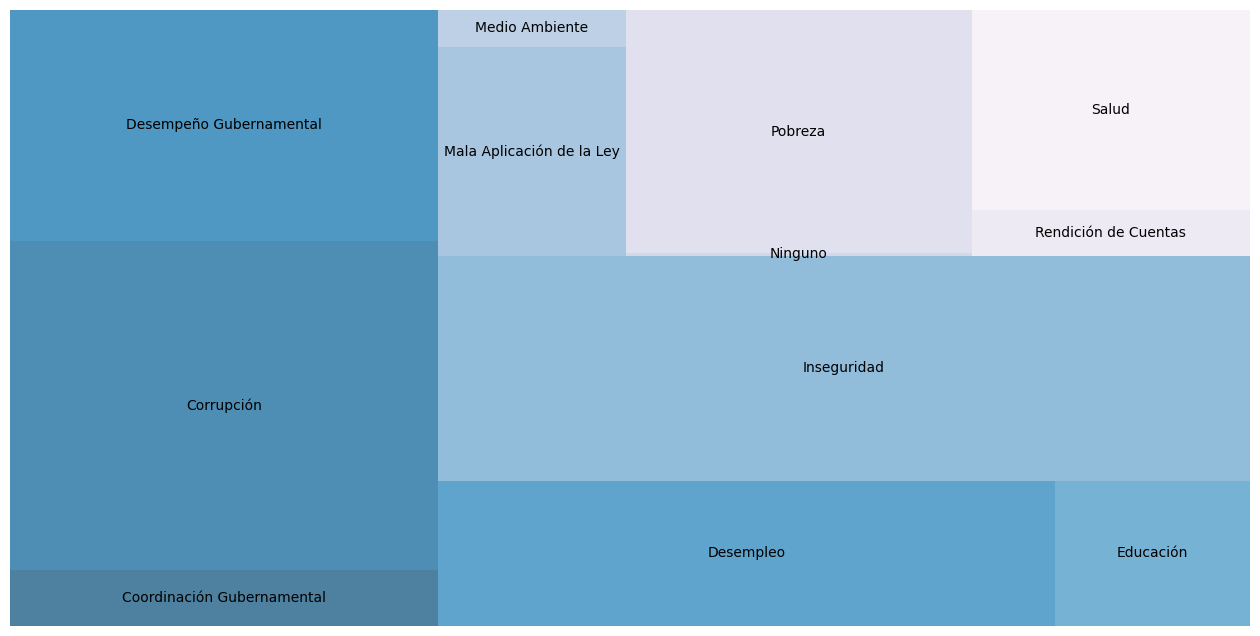

In [62]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 8)

squarify.plot(sizes = frecuency_by_states['Frecuencia'], label = frecuency_by_states['Ploblematica'], 
              color = sns.color_palette('PuBu_r', len(frecuency_by_states['Frecuencia'])), alpha = .7) # treemap generado utilizando la libreria squarify

plt.axis('off')
plt.savefig('Treemap.png')
plt.show()

El treemap muestra cómo se distribuyen las principales problemáticas entre la población, destacando la gravedad de cada problemática en términos de su frecuencia reportada. Los dos problemas principales que afectan a la poblacion son en temas de **seguridad**, con una frecuencia de 27,869, y **corrupción**, con 21,520 casos. Estas problemáticas están representadas como las áreas más grandes en el treemap.

Las categorías **Ninguno** y **Medio Ambiente** son las menos frecuentes, con solo 132 y 1,054 casos, respectivamente. Estas ocupan la menor área en el treemap.

#### Análisis de Correspondencia

El análisis de correspondencia se realiza para explorar y visualizar las relaciones entre las filas y columnas de una tabla de contingencia. En este caso, la tabla de contingencia *contingency_table_main_issues* muestra la frecuencia de ocurrencia de diferentes problemáticas (columnas) en las distintas entidades federativas (filas). En este contexto, se pretende analizar la asociación entre las problemáticas y las entidades federativas.

In [63]:
ca = prince.CA(n_components = 3, n_iter = 3, copy = True, 
               check_input = True, engine = 'sklearn', random_state = 0) # modelo de analisis de correspondencia 
ca = ca.fit(contingency_table_main_issues) # ajustar el modelo a los datos

In [64]:
ca.eigenvalues_summary 

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.018,41.17%,41.17%
1,0.011,26.33%,67.50%
2,0.004,8.96%,76.46%


Las dos primeras componentes explican más del **60% de la varianza total**.

In [65]:
ca.plot(contingency_table_main_issues, x_component = 0, y_component = 1, show_row_markers = True,
        show_column_markers = False, show_row_labels = False, show_column_labels = True)

alt.LayerChart(...)

In [66]:
ca.plot(contingency_table_main_issues, x_component = 0, y_component = 1, show_row_markers = False,
        show_column_markers = True, show_row_labels = True, show_column_labels = False)

alt.LayerChart(...)

In [67]:
ca.plot(contingency_table_main_issues, x_component = 0, y_component = 1, show_row_markers = False,
        show_column_markers = True, show_row_labels = True, show_column_labels = True)

alt.LayerChart(...)

In [68]:
ca.column_contributions_.style.format('{:.0%}')

,0,1,2
Desempeno_Gub,8%,0%,9%
Pobreza,15%,1%,3%
Corrupcion,4%,1%,0%
Desempleo,41%,15%,0%
Inseguridad,16%,7%,14%
Aplicacion_Ley,2%,7%,1%
Desastres_Naturales,0%,0%,31%
Educacion,0%,4%,28%
Salud,11%,39%,10%
Coordinacion_Gub,1%,13%,0%


In [69]:
ca.row_contributions_.style.format('{:.0%}')

,0,1,2
AGS,0%,0%,0%
BC,4%,1%,0%
BCS,14%,0%,1%
CAMP,14%,0%,2%
CDMX,9%,8%,21%
CHIH,0%,1%,1%
CHIS,3%,0%,16%
COAH,1%,5%,2%
COL,2%,1%,1%
DGO,12%,0%,0%


## Percepción de la Corrupción

In [70]:
columns = list(range(32, 54)) # columnas de interes: variables relacionadas a la percepcion de la corrupcion

In [71]:
updated_names = ['Percepcion', 'Universidades', 'Policia', 'Hospitales', 'Secretarias', 
                'Empresarios', 'Gubernatura', 'Trabajo', 'Municipio', 'Familiares', 
                'Sindicatos', 'Vecinos', 'Diputados_Senadores', 'Medios_Comunicacion', 'Intitutos_Electorales', 
                'Comisiones_Derechos', 'Escuelas_Publicas', 'Jueces_Magistrados', 'Insituciones_Religiosas', 'Partidos_Politicos', 
                'Ejercito_Marina', 'Ministerio_Publico', 'Entidad_Federativa'] # redefinir nombre de las variables de acuerdo al diccionario de datos de la base de datos

In [72]:
corruption = sec_1_3_4_5_8_9_10 .iloc[:, columns].astype(int).copy() # conversion de string a int
corruption['NOM_ENT'] = sec_1_3_4_5_8_9_10 ['NOM_ENT'] # agregar columna con los nombres de las entidades federativas actualizados
corruption.columns = updated_names # actualizar el nombre de las variables
corruption.head()

,Percepcion,Universidades,Policia,Hospitales,Secretarias,Empresarios,Gubernatura,Trabajo,Municipio,Familiares,...,Medios_Comunicacion,Intitutos_Electorales,Comisiones_Derechos,Escuelas_Publicas,Jueces_Magistrados,Insituciones_Religiosas,Partidos_Politicos,Ejercito_Marina,Ministerio_Publico,Entidad_Federativa
0,1,1,1,9,1,1,1,3,1,4,...,1,1,1,1,1,1,1,3,1,AGS
1,1,3,1,4,1,3,1,3,1,3,...,2,1,2,3,3,3,1,3,1,AGS
2,2,4,1,4,4,4,2,4,4,4,...,4,3,4,4,3,4,2,4,2,AGS
3,2,4,1,1,1,1,1,9,1,4,...,4,9,3,2,3,4,2,9,2,AGS
4,9,3,2,3,3,9,3,4,3,4,...,3,3,3,9,9,4,3,9,3,AGS


In [73]:
corruption.dtypes # verificar los tipos de datos del conjunto de datos

Percepcion                          int64
Universidades                       int64
Policia                             int64
Hospitales                          int64
Secretarias                         int64
Empresarios                         int64
Gubernatura                         int64
Trabajo                             int64
Municipio                           int64
Familiares                          int64
Sindicatos                          int64
Vecinos                             int64
Diputados_Senadores                 int64
Medios_Comunicacion                 int64
Intitutos_Electorales               int64
Comisiones_Derechos                 int64
Escuelas_Publicas                   int64
Jueces_Magistrados                  int64
Insituciones_Religiosas             int64
Partidos_Politicos                  int64
Ejercito_Marina                     int64
Ministerio_Publico                  int64
Entidad_Federativa         string[python]
dtype: object

### Percepción de la Corrupción en las Entidades Federativas

In [74]:
corruption_perception = corruption.loc[:, ['Entidad_Federativa', 'Percepcion']].copy() # percepcion de la corrupcion por entidad federativa
corruption_perception['Percepcion'] = corruption_perception['Percepcion'].replace({1: 'Muy_Frecuente', 2: 'Frecuente', 3: 'Poco_Frecuente', 
                                                                                  4: 'Nada_Frecuente', 9: 'No_Sabe'}) # reemplazar el valor numerico por la categoria correspondiente

In [75]:
corruption_perception.head()

,Entidad_Federativa,Percepcion
0,AGS,Muy_Frecuente
1,AGS,Muy_Frecuente
2,AGS,Frecuente
3,AGS,Frecuente
4,AGS,No_Sabe


In [76]:
contingency_table_corruption_perception = corruption_perception.pivot_table(index = 'Entidad_Federativa', columns = 'Percepcion', aggfunc = len, fill_value = 0) # agrupar observaciones por estado y contar no. de ocurrencias de cada nivel de percepcion
contingency_table_corruption_perception.head()

Percepcion,Frecuente,Muy_Frecuente,Nada_Frecuente,No_Sabe,Poco_Frecuente
Entidad_Federativa,,,,,
AGS,687,496,20,36,180
BC,343,490,10,15,82
BCS,518,472,12,20,94
CAMP,495,321,9,5,144
CDMX,1400,3355,24,19,151


Para obtener una medida del nivel de percepción de la corrupción por entidad federativa, se unieron las categorías **Muy Frecuente** y **Frecuente** en una sola, indicando la *presencia de corrupción*. De igual manera, se combinaron las categorías **Nada Frecuente** y **Poco Frecuente** en una sola, indicando la *ausencia de corrupción*. Las respuestas de la categoría **No sabe/No responde** fueron descartadas, ya que no aportan información relevante sobre la percepción de corrupción.

In [77]:
average_level_corruption = contingency_table_corruption_perception.drop(['No_Sabe'], axis = 1).copy() # eliminar variable No Sabe/Responde

In [78]:
average_level_corruption['Presencia'] = average_level_corruption['Muy_Frecuente'] + average_level_corruption['Frecuente'] # variable Presencia incluye observaciones de las categorias Muy Frecuente y Frecuente
average_level_corruption['Ausencia'] = average_level_corruption['Poco_Frecuente'] + average_level_corruption['Nada_Frecuente'] # variable Ausencia incluye observaciones de las categorias Poco Frecuente y Nada Frecuente
average_level_corruption['Total'] = average_level_corruption['Ausencia'] + average_level_corruption['Presencia'] # no. total de observaciones 
average_level_corruption['Porcentaje'] = ((average_level_corruption['Presencia'] / average_level_corruption['Total'])*100).round(2) # porcentaje del nivel de percepcion de corrupcion por entidad federativa

In [79]:
average_level_corruption = average_level_corruption.iloc[:, 4:]
average_level_corruption.head()

Percepcion,Presencia,Ausencia,Total,Porcentaje
Entidad_Federativa,,,,
AGS,1183,200,1383,85.54
BC,833,92,925,90.05
BCS,990,106,1096,90.33
CAMP,816,153,969,84.21
CDMX,4755,175,4930,96.45


In [80]:
barplot_corruption = average_level_corruption.reset_index().rename(columns = {'Entidad_Federativa': 'Entidad Federativa'}).copy()

In [81]:
pio.renderers.default = 'iframe'
fig = px.bar(barplot_corruption, x = 'Entidad Federativa', y = 'Porcentaje')
fig.update_layout(xaxis = {'categoryorder':'total descending'}) 
fig.update_traces(marker_color = 'indianred', marker_line_color = 'brown', marker_line_width = 1.5, opacity = 0.6)
fig.update_layout(title_text = 'Nivel de Percepción de la Corrupción por Entidad Federativa')
fig.show()

En general, todas las entidades federativas muestran un **alto porcentaje de percepción de corrupción**, con valores que oscilan entre el 76.51% y el 96.45%. Esto sugiere que la corrupción es percibida como un **problema significativo** en todas las entidades federativas. Aunque existe variación entre las entidades federativas, todas muestran una preocupación considerablemente alta por la corrupción en comparación con la ausencia de esta.

### Panorama General de la Percepción de la Corrupción en México

In [85]:
geographical_data_mx = geopandas.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")
geographical_data_mx.head() # conjunto de datos geográficos de México

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908..."
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774..."
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028..."
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ..."
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ..."


In [86]:
geographical_data_mx['state'].unique() # nombres de las entidades federativas registradas en el conjunto de datos geograficos

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila de Zaragoza',
       'Colima', 'Distrito Federal', 'Durango', 'Guanajuato', 'Guerrero',
       'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo', 'Morelos',
       'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro',
       'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatán', 'Zacatecas'], dtype=object)

In [87]:
geographical_data_mx['state'] = geographical_data_mx['state'].replace({'Aguascalientes': 'AGS', 'Baja California': 'BC', 'Baja California Sur': 'BCS', 'Campeche': 'CAMP', 'Coahuila de Zaragoza': 'COAH', 
                                'Colima': 'COL', 'Chiapas': 'CHIS', 'Chihuahua': 'CHIH', 'Distrito Federal': 'CDMX', 'Durango': 'DGO', 
                                'Guanajuato': 'GTO', 'Guerrero': 'GRO', 'Hidalgo': 'HGO', 'Jalisco': 'JAL', 'México': 'MEX', 
                                'Michoacán de Ocampo': 'MICH', 'Morelos': 'MOR', 'Nayarit': 'NAY', 'Nuevo León': 'NL', 'Oaxaca': 'OAX', 
                                'Puebla': 'PUE', 'Querétaro': 'QRO', 'Quintana Roo': 'QR', 'San Luis Potosí': 'SLP', 'Sinaloa': 'SIN', 
                                'Sonora': 'SON', 'Tabasco': 'TAB', 'Tamaulipas': 'TAM', 'Tlaxcala': 'TLAX', 'Veracruz de Ignacio de la Llave': 'VER', 
                                'Yucatán': 'YUC', 'Zacatecas': 'ZAC'}) # abreviación de los nombres de las entidades federativas para garantizar compatibilidad entre los conjuntos de datos
geographical_data_mx['state'].unique() # verificar cambio

array(['AGS', 'BC', 'BCS', 'CAMP', 'CHIS', 'CHIH', 'COAH', 'COL', 'CDMX',
       'DGO', 'GTO', 'GRO', 'HGO', 'JAL', 'MEX', 'MICH', 'MOR', 'NAY',
       'NL', 'OAX', 'PUE', 'QRO', 'QR', 'SLP', 'SIN', 'SON', 'TAB', 'TAM',
       'TLAX', 'VER', 'YUC', 'ZAC'], dtype=object)

In [88]:
corruption_data = average_level_corruption.reset_index().copy()
corruption_data = corruption_data.loc[:, ['Entidad_Federativa', 'Porcentaje']] # columnas de interes: entidades federativas y porcentaje de percepción de corrupción por entidad federativa 
names = ['state', 'percent'] 
corruption_data.columns = names 

In [89]:
corruption_map = pd.merge(geographical_data_mx, corruption_data, how = 'inner', on = ['state']) # unir conjunto de datos geograficos con el conjunto de datos de corrupcion apartir de la columna compartida 'state'

corruption_map.head(2)

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,percent
0,1,Aguascalientes,AGS,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",85.54
1,2,Baja California,BC,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",90.05


In [90]:
corruption_map.dtypes

id             int64
name          object
state         object
mus09        float64
pri10        float64
sec10        float64
ter10        float64
gdp08        float64
other10      float64
geometry    geometry
percent      float64
dtype: object

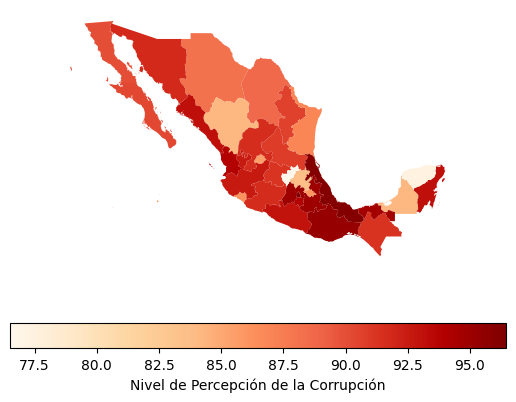

In [91]:
ax = corruption_map.plot(column = 'percent', cmap = 'OrRd', legend = True,
                        legend_kwds = {"label": "Nivel de Percepción de la Corrupción", "orientation": "horizontal"})
ax.set_axis_off()
fig = ax.get_figure()
fig.savefig('NivelCorrupción.png')

La percepción de corrupción en México es generalizada, con un **alto porcentaje** en todas las entidades federativas. Todas las regiones muestran preocupaciones considerables en cuanto a la corrupción.

#### Análisis de Correspondencia

Se llevó a cabo un análisis de correspondencia utilizando la tabla de contingencia *contingency_table_corruption_perception* con el fin de entender la relación entre la percepción de corrupción y las entidades federativas. Se busca identificar patrones o relaciones entre las percepciones de corrupción y las regiones geográficas representadas por las entidades federativas.

In [92]:
ca = prince.CA(n_components = 3, n_iter = 3, copy = True, 
               check_input = True, engine = 'sklearn', random_state = 0) # modelo de analisis de correspondencia 
ca = ca.fit(contingency_table_corruption_perception) # ajustar el modelo a los datos

In [93]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.058,84.76%,84.76%
1,0.007,9.60%,94.37%
2,0.003,3.76%,98.12%


Las dos primeras componentes explican más del **90% de la varianza total**.

In [94]:
ca.plot(contingency_table_corruption_perception, x_component = 0, y_component = 1, show_row_markers = True,
        show_column_markers = False, show_row_labels = False, show_column_labels = True)

alt.LayerChart(...)

In [95]:
ca.plot(contingency_table_corruption_perception, x_component = 0, y_component = 1, show_row_markers = False,
        show_column_markers = True, show_row_labels = True, show_column_labels = False)

alt.LayerChart(...)

In [96]:
ca.plot(contingency_table_corruption_perception, x_component = 0, y_component = 1, show_row_markers = False,
        show_column_markers = True, show_row_labels = True, show_column_labels = True)

alt.LayerChart(...)

In [97]:
ca.column_contributions_.style.format('{:.0%}')

,0,1,2
Frecuente,16%,43%,0%
Muy_Frecuente,43%,7%,0%
Nada_Frecuente,3%,11%,5%
No_Sabe,3%,6%,77%
Poco_Frecuente,35%,33%,17%


In [98]:
ca.row_contributions_.style.format('{:.0%}')

,0,1,2
AGS,6%,0%,6%
BC,0%,1%,0%
BCS,1%,3%,3%
CAMP,5%,2%,16%
CDMX,30%,4%,5%
CHIH,0%,0%,3%
CHIS,0%,1%,0%
COAH,0%,9%,2%
COL,2%,1%,1%
DGO,2%,5%,1%


### Percepción de la Corrupción en Instituciones Públicas

In [99]:
corruption_per_institution = corruption.iloc[:, 1:22].copy() # percepcion de la corrupcion por entidad federativa
corruption_per_institution = corruption_per_institution.replace({1: 'Muy_Frecuente', 2: 'Frecuente', 3: 'Poco_Frecuente', 
                                                                 4: 'Nada_Frecuente', 9: 'No_Sabe'}) # reemplazar el valor numerico por la categoria correspondiente

In [100]:
corruption_per_institution.head()

,Universidades,Policia,Hospitales,Secretarias,Empresarios,Gubernatura,Trabajo,Municipio,Familiares,Sindicatos,...,Diputados_Senadores,Medios_Comunicacion,Intitutos_Electorales,Comisiones_Derechos,Escuelas_Publicas,Jueces_Magistrados,Insituciones_Religiosas,Partidos_Politicos,Ejercito_Marina,Ministerio_Publico
0,Muy_Frecuente,Muy_Frecuente,No_Sabe,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,Nada_Frecuente,Poco_Frecuente,...,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente
1,Poco_Frecuente,Muy_Frecuente,Nada_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,...,Muy_Frecuente,Frecuente,Muy_Frecuente,Frecuente,Poco_Frecuente,Poco_Frecuente,Poco_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente
2,Nada_Frecuente,Muy_Frecuente,Nada_Frecuente,Nada_Frecuente,Nada_Frecuente,Frecuente,Nada_Frecuente,Nada_Frecuente,Nada_Frecuente,No_Sabe,...,Poco_Frecuente,Nada_Frecuente,Poco_Frecuente,Nada_Frecuente,Nada_Frecuente,Poco_Frecuente,Nada_Frecuente,Frecuente,Nada_Frecuente,Frecuente
3,Nada_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,No_Sabe,Muy_Frecuente,Nada_Frecuente,Frecuente,...,Frecuente,Nada_Frecuente,No_Sabe,Poco_Frecuente,Frecuente,Poco_Frecuente,Nada_Frecuente,Frecuente,No_Sabe,Frecuente
4,Poco_Frecuente,Frecuente,Poco_Frecuente,Poco_Frecuente,No_Sabe,Poco_Frecuente,Nada_Frecuente,Poco_Frecuente,Nada_Frecuente,Poco_Frecuente,...,No_Sabe,Poco_Frecuente,Poco_Frecuente,Poco_Frecuente,No_Sabe,No_Sabe,Nada_Frecuente,Poco_Frecuente,No_Sabe,Poco_Frecuente


In [101]:
corruption_per_institution.columns # insituciones publicas

Index(['Universidades', 'Policia', 'Hospitales', 'Secretarias', 'Empresarios',
       'Gubernatura', 'Trabajo', 'Municipio', 'Familiares', 'Sindicatos',
       'Vecinos', 'Diputados_Senadores', 'Medios_Comunicacion',
       'Intitutos_Electorales', 'Comisiones_Derechos', 'Escuelas_Publicas',
       'Jueces_Magistrados', 'Insituciones_Religiosas', 'Partidos_Politicos',
       'Ejercito_Marina', 'Ministerio_Publico'],
      dtype='object')

In [102]:
categories = ['Muy_Frecuente', 'Frecuente', 'Poco_Frecuente', 'Nada_Frecuente', 'No_Sabe'] # niveles de percepcion de la corrupcion
contingency_table_corruption_insitutes = pd.DataFrame(columns = categories) # no. ocurrencias de cada nivel de percepcion en las distintas instituciones publicas
contingency_table_corruption_insitutes.head() # conjunto de datos vacio

,Muy_Frecuente,Frecuente,Poco_Frecuente,Nada_Frecuente,No_Sabe


In [103]:
for column in corruption_per_institution.columns:
    frecuency = corruption_per_institution[column].value_counts().reindex(categories, fill_value = 0).to_dict() # ocurrencias de los distintos niveles de percepcion de la corrupcion (categorias) para las distintas instituciones
    contingency_table_corruption_insitutes = pd.concat([contingency_table_corruption_insitutes, pd.DataFrame(frecuency, index = [column])]) # anadir fila (institucion) con el no. de ocurrencias para las distintas categorias (columnas)

In [104]:
contingency_table_corruption_insitutes.head()

,Muy_Frecuente,Frecuente,Poco_Frecuente,Nada_Frecuente,No_Sabe
Universidades,6368,12859,12167,2114,5657
Policia,22976,11910,3201,437,641
Hospitales,6601,12257,14037,3863,2407
Secretarias,22386,10894,3492,696,1697
Empresarios,11350,15104,8256,1249,3206


In [105]:
contingency_table_corruption_insitutes.dtypes # verificar los tipos de datos de la tabla de contingencia

Muy_Frecuente     object
Frecuente         object
Poco_Frecuente    object
Nada_Frecuente    object
No_Sabe           object
dtype: object

In [106]:
contingency_table_corruption_insitutes[categories] = contingency_table_corruption_insitutes[categories].astype(int) # conversion de object a int
contingency_table_corruption_insitutes.dtypes # verificar los tipos de datos de la tabla de contingencia 

Muy_Frecuente     int64
Frecuente         int64
Poco_Frecuente    int64
Nada_Frecuente    int64
No_Sabe           int64
dtype: object

#### Análisis de Correspondencia

En este caso el análisis de correspondencia nos ayudaría a identificar patrones y relaciones entre la percepción de corrupción y las diferentes instituciones públicas, lo que proporcionaría información valiosa para comprender mejor la dinámica de la corrupción en el sector público y orientar esfuerzos para combatirla.

In [107]:
ca = prince.CA(n_components = 3, n_iter = 3, copy = True, 
               check_input = True, engine = 'sklearn', random_state = 0) # modelo de analisis de correspondencia 
ca = ca.fit(contingency_table_corruption_insitutes) # ajustar el modelo a los datos

In [108]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.257,80.88%,80.88%
1,0.039,12.33%,93.21%
2,0.018,5.73%,98.94%


Las dos primeras componentes explican más del **90% de la varianza total**.

In [109]:
ca.plot(contingency_table_corruption_insitutes, x_component = 0, y_component = 1, show_row_markers = True,
        show_column_markers = False, show_row_labels = False, show_column_labels = True)

alt.LayerChart(...)

In [110]:
ca.plot(contingency_table_corruption_insitutes, x_component = 0, y_component = 1, show_row_markers = False,
        show_column_markers = True, show_row_labels = True, show_column_labels = False)

alt.LayerChart(...)

In [111]:
ca.plot(contingency_table_corruption_insitutes, x_component = 0, y_component = 1, show_row_markers = False,
        show_column_markers = True, show_row_labels = True, show_column_labels = True)

alt.LayerChart(...)

In [112]:
ca.column_contributions_.style.format('{:.0%}')

,0,1,2
Muy_Frecuente,41%,15%,4%
Frecuente,3%,9%,10%
Poco_Frecuente,19%,4%,21%
Nada_Frecuente,34%,42%,6%
No_Sabe,3%,30%,59%


In [113]:
ca.row_contributions_.style.format('{:.0%}')

,0,1,2
Universidades,1%,17%,0%
Policia,8%,5%,0%
Hospitales,1%,2%,13%
Secretarias,7%,3%,2%
Empresarios,0%,5%,1%
Gubernatura,4%,1%,0%
Trabajo,9%,6%,50%
Municipio,3%,0%,1%
Familiares,19%,32%,0%
Sindicatos,0%,5%,5%


### Percepción de la Corrupción y su Relación con la Confianza Ciudadana en las Instituciones Publicas

#### Nivel de Percepción de la Corrupción en las Instituciones Públicas

In [114]:
id_corruption = sec_1_3_4_5_8_9_10.loc[:, ['ENT', 'UPM', 'V_SEL', 'P3_2', 'P3_3_1', 'P3_3_2', 'P3_3_3', 'P3_3_4', 'P3_3_5', 
                           'P3_3_6', 'P3_3_7', 'P3_3_8', 'P3_3_9', 'P3_3_10', 'P3_3_11', 'P3_3_12', 'P3_3_13', 'P3_3_14',
                           'P3_3_15', 'P3_3_16', 'P3_3_17', 'P3_3_18', 'P3_3_19', 'P3_3_20', 'P3_3_21']].copy() # conjunto de datos con las variables relacionadas al nivel de percepcion de corrupcion hacia instituciones manteniendo variables compartidas ENT, UPM, y V_SEL 

In [115]:
id_corruption.shape # dimensiones del conjunto de datos

(39165, 25)

In [116]:
id_corruption.head()

,ENT,UPM,V_SEL,P3_2,P3_3_1,P3_3_2,P3_3_3,P3_3_4,P3_3_5,P3_3_6,...,P3_3_12,P3_3_13,P3_3_14,P3_3_15,P3_3_16,P3_3_17,P3_3_18,P3_3_19,P3_3_20,P3_3_21
0,01,0100026,01,1,1,1,9,1,1,1,...,1,1,1,1,1,1,1,1,3,1
1,01,0100026,03,1,3,1,4,1,3,1,...,1,2,1,2,3,3,3,1,3,1
2,01,0100026,04,2,4,1,4,4,4,2,...,3,4,3,4,4,3,4,2,4,2
3,01,0100026,05,2,4,1,1,1,1,1,...,2,4,9,3,2,3,4,2,9,2
4,01,0100027,01,9,3,2,3,3,9,3,...,9,3,3,3,9,9,4,3,9,3


In [117]:
id_corruption.dtypes

ENT        string[python]
UPM        string[python]
V_SEL      string[python]
P3_2       string[python]
P3_3_1     string[python]
P3_3_2     string[python]
P3_3_3     string[python]
P3_3_4     string[python]
P3_3_5     string[python]
P3_3_6     string[python]
P3_3_7     string[python]
P3_3_8     string[python]
P3_3_9     string[python]
P3_3_10    string[python]
P3_3_11    string[python]
P3_3_12    string[python]
P3_3_13    string[python]
P3_3_14    string[python]
P3_3_15    string[python]
P3_3_16    string[python]
P3_3_17    string[python]
P3_3_18    string[python]
P3_3_19    string[python]
P3_3_20    string[python]
P3_3_21    string[python]
dtype: object

In [118]:
id_corruption.iloc[:, list(range(3, 25))] = id_corruption.iloc[:, list(range(3, 25))].apply(pd.to_numeric, errors = 'coerce').astype('int64') # conversion de tipos de datos string a int
id_corruption.dtypes # verificar los tipos de datos del conjunto de datos

ENT        string[python]
UPM        string[python]
V_SEL      string[python]
P3_2                int64
P3_3_1              int64
P3_3_2              int64
P3_3_3              int64
P3_3_4              int64
P3_3_5              int64
P3_3_6              int64
P3_3_7              int64
P3_3_8              int64
P3_3_9              int64
P3_3_10             int64
P3_3_11             int64
P3_3_12             int64
P3_3_13             int64
P3_3_14             int64
P3_3_15             int64
P3_3_16             int64
P3_3_17             int64
P3_3_18             int64
P3_3_19             int64
P3_3_20             int64
P3_3_21             int64
dtype: object

In [119]:
id_corruption = id_corruption.replace({1: 'Muy_Frecuente', 2: 'Frecuente', 3: 'Poco_Frecuente', 
                                       4: 'Nada_Frecuente', 9: 'No_Sabe'}) # reemplazar el valor numerico por la categoria correspondiente

In [120]:
id_corruption.head()

,ENT,UPM,V_SEL,P3_2,P3_3_1,P3_3_2,P3_3_3,P3_3_4,P3_3_5,P3_3_6,...,P3_3_12,P3_3_13,P3_3_14,P3_3_15,P3_3_16,P3_3_17,P3_3_18,P3_3_19,P3_3_20,P3_3_21
0,01,0100026,01,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,No_Sabe,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,...,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente
1,01,0100026,03,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,Nada_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,...,Muy_Frecuente,Frecuente,Muy_Frecuente,Frecuente,Poco_Frecuente,Poco_Frecuente,Poco_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente
2,01,0100026,04,Frecuente,Nada_Frecuente,Muy_Frecuente,Nada_Frecuente,Nada_Frecuente,Nada_Frecuente,Frecuente,...,Poco_Frecuente,Nada_Frecuente,Poco_Frecuente,Nada_Frecuente,Nada_Frecuente,Poco_Frecuente,Nada_Frecuente,Frecuente,Nada_Frecuente,Frecuente
3,01,0100026,05,Frecuente,Nada_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,...,Frecuente,Nada_Frecuente,No_Sabe,Poco_Frecuente,Frecuente,Poco_Frecuente,Nada_Frecuente,Frecuente,No_Sabe,Frecuente
4,01,0100027,01,No_Sabe,Poco_Frecuente,Frecuente,Poco_Frecuente,Poco_Frecuente,No_Sabe,Poco_Frecuente,...,No_Sabe,Poco_Frecuente,Poco_Frecuente,Poco_Frecuente,No_Sabe,No_Sabe,Nada_Frecuente,Poco_Frecuente,No_Sabe,Poco_Frecuente


In [121]:
id_corruption.tail()

,ENT,UPM,V_SEL,P3_2,P3_3_1,P3_3_2,P3_3_3,P3_3_4,P3_3_5,P3_3_6,...,P3_3_12,P3_3_13,P3_3_14,P3_3_15,P3_3_16,P3_3_17,P3_3_18,P3_3_19,P3_3_20,P3_3_21
39160,32,3201157,05,Muy_Frecuente,Frecuente,Muy_Frecuente,Frecuente,Muy_Frecuente,Muy_Frecuente,Frecuente,...,Muy_Frecuente,Frecuente,Frecuente,Frecuente,Frecuente,Frecuente,Frecuente,Muy_Frecuente,Poco_Frecuente,Poco_Frecuente
39161,32,3201162,01,Frecuente,No_Sabe,Frecuente,Poco_Frecuente,Frecuente,Poco_Frecuente,Frecuente,...,Frecuente,Frecuente,Frecuente,Frecuente,Poco_Frecuente,Frecuente,Poco_Frecuente,Muy_Frecuente,Frecuente,Poco_Frecuente
39162,32,3201162,02,Frecuente,No_Sabe,Muy_Frecuente,No_Sabe,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,...,Muy_Frecuente,Frecuente,No_Sabe,Nada_Frecuente,Nada_Frecuente,No_Sabe,No_Sabe,Frecuente,No_Sabe,Poco_Frecuente
39163,32,3201162,04,Frecuente,Muy_Frecuente,Muy_Frecuente,Frecuente,Muy_Frecuente,Poco_Frecuente,Frecuente,...,Muy_Frecuente,Frecuente,Frecuente,Poco_Frecuente,Frecuente,Poco_Frecuente,Nada_Frecuente,Muy_Frecuente,Poco_Frecuente,Frecuente
39164,32,3201162,05,Frecuente,Frecuente,Frecuente,Frecuente,Poco_Frecuente,Frecuente,Frecuente,...,Muy_Frecuente,Frecuente,Frecuente,Poco_Frecuente,Poco_Frecuente,Poco_Frecuente,Frecuente,Muy_Frecuente,Frecuente,Frecuente


#### Nivel de Confianza Ciudadana en las Instituciones Públicas

In [122]:
trust_confidence_public_institutes = sec_11.loc[:, ['ENT', 'UPM', 'V_SEL', 'P11_1_1', 'P11_1_2', 'P11_1_3', 'P11_1_4', 'P11_1_5', 'P11_1_6',
               'P11_1_7', 'P11_1_8', 'P11_1_9', 'P11_1_10', 'P11_1_11', 'P11_1_12', 'P11_1_13', 'P11_1_14', 
               'P11_1_15', 'P11_1_16', 'P11_1_17', 'P11_1_18','P11_1_19', 'P11_1_20', 'P11_1_21']].copy() # conjunto de datos con las variables relacionadas al nivel de confianza hacia instituciones manteniendo variables compartidas ENT, UPM, y V_SEL 

In [123]:
trust_confidence_public_institutes.shape # dimensiones del conjunto de datos

(39165, 24)

In [124]:
trust_confidence_public_institutes.head()

,ENT,UPM,V_SEL,P11_1_1,P11_1_2,P11_1_3,P11_1_4,P11_1_5,P11_1_6,P11_1_7,...,P11_1_12,P11_1_13,P11_1_14,P11_1_15,P11_1_16,P11_1_17,P11_1_18,P11_1_19,P11_1_20,P11_1_21
0,01,0100026,01,1,3,9,4,2,2,1,...,4,3,4,4,2,3,2,4,2,4
1,01,0100026,03,1,4,3,4,2,3,5,...,4,3,3,2,1,2,1,4,1,3
2,01,0100026,04,2,3,2,9,9,9,2,...,2,2,3,9,2,9,9,9,2,4
3,01,0100026,05,2,4,2,3,3,3,5,...,9,2,9,2,3,9,3,4,2,4
4,01,0100027,01,1,2,2,2,9,2,2,...,9,9,2,2,5,9,2,2,9,2


In [125]:
trust_confidence_public_institutes.dtypes

ENT         string[python]
UPM         string[python]
V_SEL       string[python]
P11_1_1     string[python]
P11_1_2     string[python]
P11_1_3     string[python]
P11_1_4     string[python]
P11_1_5     string[python]
P11_1_6     string[python]
P11_1_7     string[python]
P11_1_8     string[python]
P11_1_9     string[python]
P11_1_10    string[python]
P11_1_11    string[python]
P11_1_12    string[python]
P11_1_13    string[python]
P11_1_14    string[python]
P11_1_15    string[python]
P11_1_16    string[python]
P11_1_17    string[python]
P11_1_18    string[python]
P11_1_19    string[python]
P11_1_20    string[python]
P11_1_21    string[python]
dtype: object

In [126]:
trust_confidence_public_institutes.iloc[:, list(range(3, 24))] = trust_confidence_public_institutes.iloc[:, list(range(3, 24))].apply(pd.to_numeric, errors = 'coerce').astype('int64') # conversion de tipos de datos string a int
trust_confidence_public_institutes.dtypes # verificar los tipos de datos del conjunto de datos

ENT         string[python]
UPM         string[python]
V_SEL       string[python]
P11_1_1              int64
P11_1_2              int64
P11_1_3              int64
P11_1_4              int64
P11_1_5              int64
P11_1_6              int64
P11_1_7              int64
P11_1_8              int64
P11_1_9              int64
P11_1_10             int64
P11_1_11             int64
P11_1_12             int64
P11_1_13             int64
P11_1_14             int64
P11_1_15             int64
P11_1_16             int64
P11_1_17             int64
P11_1_18             int64
P11_1_19             int64
P11_1_20             int64
P11_1_21             int64
dtype: object

In [127]:
trust_confidence_public_institutes = trust_confidence_public_institutes.replace({1: 'Mucha_Confianza', 2: 'Poca_Confianza', 3: 'Desconfianza',
                                                                                 4: 'Mucha_Desconfianza', 5: 'No_Aplica', 9: 'No_Responde'}) # reemplazar el valor numerico por la categoria correspondiente

In [128]:
trust_confidence_public_institutes

,ENT,UPM,V_SEL,P11_1_1,P11_1_2,P11_1_3,P11_1_4,P11_1_5,P11_1_6,P11_1_7,...,P11_1_12,P11_1_13,P11_1_14,P11_1_15,P11_1_16,P11_1_17,P11_1_18,P11_1_19,P11_1_20,P11_1_21
0,01,0100026,01,Mucha_Confianza,Desconfianza,No_Responde,Mucha_Desconfianza,Poca_Confianza,Poca_Confianza,Mucha_Confianza,...,Mucha_Desconfianza,Desconfianza,Mucha_Desconfianza,Mucha_Desconfianza,Poca_Confianza,Desconfianza,Poca_Confianza,Mucha_Desconfianza,Poca_Confianza,Mucha_Desconfianza
1,01,0100026,03,Mucha_Confianza,Mucha_Desconfianza,Desconfianza,Mucha_Desconfianza,Poca_Confianza,Desconfianza,No_Aplica,...,Mucha_Desconfianza,Desconfianza,Desconfianza,Poca_Confianza,Mucha_Confianza,Poca_Confianza,Mucha_Confianza,Mucha_Desconfianza,Mucha_Confianza,Desconfianza
2,01,0100026,04,Poca_Confianza,Desconfianza,Poca_Confianza,No_Responde,No_Responde,No_Responde,Poca_Confianza,...,Poca_Confianza,Poca_Confianza,Desconfianza,No_Responde,Poca_Confianza,No_Responde,No_Responde,No_Responde,Poca_Confianza,Mucha_Desconfianza
3,01,0100026,05,Poca_Confianza,Mucha_Desconfianza,Poca_Confianza,Desconfianza,Desconfianza,Desconfianza,No_Aplica,...,No_Responde,Poca_Confianza,No_Responde,Poca_Confianza,Desconfianza,No_Responde,Desconfianza,Mucha_Desconfianza,Poca_Confianza,Mucha_Desconfianza
4,01,0100027,01,Mucha_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,No_Responde,Poca_Confianza,Poca_Confianza,...,No_Responde,No_Responde,Poca_Confianza,Poca_Confianza,No_Aplica,No_Responde,Poca_Confianza,Poca_Confianza,No_Responde,Poca_Confianza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39160,32,3201157,05,Poca_Confianza,Mucha_Desconfianza,Poca_Confianza,Desconfianza,Desconfianza,Desconfianza,Poca_Confianza,...,Desconfianza,Poca_Confianza,Desconfianza,Desconfianza,Poca_Confianza,Poca_Confianza,Desconfianza,Desconfianza,Poca_Confianza,Poca_Confianza
39161,32,3201162,01,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,No_Aplica,...,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza
39162,32,3201162,02,Desconfianza,Desconfianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Mucha_Confianza,...,Desconfianza,Desconfianza,Desconfianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Poca_Confianza,Desconfianza,Poca_Confianza,Desconfianza
39163,32,3201162,04,Desconfianza,Mucha_Desconfianza,Mucha_Confianza,Desconfianza,No_Responde,Mucha_Desconfianza,No_Responde,...,Mucha_Desconfianza,Mucha_Desconfianza,Mucha_Desconfianza,Mucha_Desconfianza,Poca_Confianza,Mucha_Desconfianza,Poca_Confianza,Mucha_Desconfianza,Poca_Confianza,Mucha_Desconfianza


#### Relación entre los Niveles de Percepción de la Corrupción y Confianza en las Instituciones Públicas

In [129]:
corruption_confidence_insitutes = pd.merge(id_corruption, trust_confidence_public_institutes, 
                                           how = 'inner', on = ['ENT', 'UPM', 'V_SEL']) # combinar los conjuntos de datos utilizando las variables compartidas ENT, UPM, y V_SEL

In [130]:
corruption_confidence_insitutes.head()

,ENT,UPM,V_SEL,P3_2,P3_3_1,P3_3_2,P3_3_3,P3_3_4,P3_3_5,P3_3_6,...,P11_1_12,P11_1_13,P11_1_14,P11_1_15,P11_1_16,P11_1_17,P11_1_18,P11_1_19,P11_1_20,P11_1_21
0,01,0100026,01,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,No_Sabe,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,...,Mucha_Desconfianza,Desconfianza,Mucha_Desconfianza,Mucha_Desconfianza,Poca_Confianza,Desconfianza,Poca_Confianza,Mucha_Desconfianza,Poca_Confianza,Mucha_Desconfianza
1,01,0100026,03,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,Nada_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,...,Mucha_Desconfianza,Desconfianza,Desconfianza,Poca_Confianza,Mucha_Confianza,Poca_Confianza,Mucha_Confianza,Mucha_Desconfianza,Mucha_Confianza,Desconfianza
2,01,0100026,04,Frecuente,Nada_Frecuente,Muy_Frecuente,Nada_Frecuente,Nada_Frecuente,Nada_Frecuente,Frecuente,...,Poca_Confianza,Poca_Confianza,Desconfianza,No_Responde,Poca_Confianza,No_Responde,No_Responde,No_Responde,Poca_Confianza,Mucha_Desconfianza
3,01,0100026,05,Frecuente,Nada_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,...,No_Responde,Poca_Confianza,No_Responde,Poca_Confianza,Desconfianza,No_Responde,Desconfianza,Mucha_Desconfianza,Poca_Confianza,Mucha_Desconfianza
4,01,0100027,01,No_Sabe,Poco_Frecuente,Frecuente,Poco_Frecuente,Poco_Frecuente,No_Sabe,Poco_Frecuente,...,No_Responde,No_Responde,Poca_Confianza,Poca_Confianza,No_Aplica,No_Responde,Poca_Confianza,Poca_Confianza,No_Responde,Poca_Confianza


In [131]:
corruption_confidence_insitutes.dtypes

ENT         string[python]
UPM         string[python]
V_SEL       string[python]
P3_2                object
P3_3_1              object
P3_3_2              object
P3_3_3              object
P3_3_4              object
P3_3_5              object
P3_3_6              object
P3_3_7              object
P3_3_8              object
P3_3_9              object
P3_3_10             object
P3_3_11             object
P3_3_12             object
P3_3_13             object
P3_3_14             object
P3_3_15             object
P3_3_16             object
P3_3_17             object
P3_3_18             object
P3_3_19             object
P3_3_20             object
P3_3_21             object
P11_1_1             object
P11_1_2             object
P11_1_3             object
P11_1_4             object
P11_1_5             object
P11_1_6             object
P11_1_7             object
P11_1_8             object
P11_1_9             object
P11_1_10            object
P11_1_11            object
P11_1_12            object
P

In [132]:
corruption_and_confidence = corruption_confidence_insitutes.iloc[:, list(range(4, 46))].copy() # conjunto de datos con las variables relacionadas a la percepcion de la corrupcion y al nivel de confianza hacia las instituciones publicas 

In [133]:
corruption_and_confidence.columns

Index(['P3_3_1', 'P3_3_2', 'P3_3_3', 'P3_3_4', 'P3_3_5', 'P3_3_6', 'P3_3_7',
       'P3_3_8', 'P3_3_9', 'P3_3_10', 'P3_3_11', 'P3_3_12', 'P3_3_13',
       'P3_3_14', 'P3_3_15', 'P3_3_16', 'P3_3_17', 'P3_3_18', 'P3_3_19',
       'P3_3_20', 'P3_3_21', 'P11_1_1', 'P11_1_2', 'P11_1_3', 'P11_1_4',
       'P11_1_5', 'P11_1_6', 'P11_1_7', 'P11_1_8', 'P11_1_9', 'P11_1_10',
       'P11_1_11', 'P11_1_12', 'P11_1_13', 'P11_1_14', 'P11_1_15', 'P11_1_16',
       'P11_1_17', 'P11_1_18', 'P11_1_19', 'P11_1_20', 'P11_1_21'],
      dtype='object')

In [134]:
corruption_and_confidence.head()

,P3_3_1,P3_3_2,P3_3_3,P3_3_4,P3_3_5,P3_3_6,P3_3_7,P3_3_8,P3_3_9,P3_3_10,...,P11_1_12,P11_1_13,P11_1_14,P11_1_15,P11_1_16,P11_1_17,P11_1_18,P11_1_19,P11_1_20,P11_1_21
0,Muy_Frecuente,Muy_Frecuente,No_Sabe,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,Nada_Frecuente,Poco_Frecuente,...,Mucha_Desconfianza,Desconfianza,Mucha_Desconfianza,Mucha_Desconfianza,Poca_Confianza,Desconfianza,Poca_Confianza,Mucha_Desconfianza,Poca_Confianza,Mucha_Desconfianza
1,Poco_Frecuente,Muy_Frecuente,Nada_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,Poco_Frecuente,Muy_Frecuente,...,Mucha_Desconfianza,Desconfianza,Desconfianza,Poca_Confianza,Mucha_Confianza,Poca_Confianza,Mucha_Confianza,Mucha_Desconfianza,Mucha_Confianza,Desconfianza
2,Nada_Frecuente,Muy_Frecuente,Nada_Frecuente,Nada_Frecuente,Nada_Frecuente,Frecuente,Nada_Frecuente,Nada_Frecuente,Nada_Frecuente,No_Sabe,...,Poca_Confianza,Poca_Confianza,Desconfianza,No_Responde,Poca_Confianza,No_Responde,No_Responde,No_Responde,Poca_Confianza,Mucha_Desconfianza
3,Nada_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,Muy_Frecuente,No_Sabe,Muy_Frecuente,Nada_Frecuente,Frecuente,...,No_Responde,Poca_Confianza,No_Responde,Poca_Confianza,Desconfianza,No_Responde,Desconfianza,Mucha_Desconfianza,Poca_Confianza,Mucha_Desconfianza
4,Poco_Frecuente,Frecuente,Poco_Frecuente,Poco_Frecuente,No_Sabe,Poco_Frecuente,Nada_Frecuente,Poco_Frecuente,Nada_Frecuente,Poco_Frecuente,...,No_Responde,No_Responde,Poca_Confianza,Poca_Confianza,No_Aplica,No_Responde,Poca_Confianza,Poca_Confianza,No_Responde,Poca_Confianza


In [135]:
categories = ['Muy_Frecuente', 'Frecuente', 'Poco_Frecuente', 'Nada_Frecuente', 'No_Sabe', 
              'Mucha_Confianza', 'Poca_Confianza', 'Desconfianza', 'Mucha_Desconfianza', 'No_Aplica', 'No_Responde'] # niveles de percepcion de la corrupcion y confianza hacias las instituciones publicas
contingency_table_corruption_confidence = pd.DataFrame(columns = categories) # no. ocurrencias de cada nivel de percepcion en las distintas instituciones publicas
contingency_table_corruption_confidence.head() # conjunto de datos vacio

,Muy_Frecuente,Frecuente,Poco_Frecuente,Nada_Frecuente,No_Sabe,Mucha_Confianza,Poca_Confianza,Desconfianza,Mucha_Desconfianza,No_Aplica,No_Responde


In [136]:
for column in corruption_and_confidence.columns:
    frecuency = corruption_and_confidence[column].value_counts().reindex(categories, fill_value = 0).to_dict() # ocurrencias de los distintos niveles de percepcion de la corrupcion (categorias) para las distintas instituciones
    contingency_table_corruption_confidence = pd.concat([contingency_table_corruption_confidence, pd.DataFrame(frecuency, index = [column])]) # anadir fila (institucion) con el no. de ocurrencias para las distintas categorias (columnas)

In [137]:
contingency_table_corruption_confidence.dtypes # verificar los tipos de datos de la tabla de contingencia

Muy_Frecuente         object
Frecuente             object
Poco_Frecuente        object
Nada_Frecuente        object
No_Sabe               object
Mucha_Confianza       object
Poca_Confianza        object
Desconfianza          object
Mucha_Desconfianza    object
No_Aplica             object
No_Responde           object
dtype: object

In [138]:
contingency_table_corruption_confidence[categories] = contingency_table_corruption_confidence[categories].astype(int) # conversion de object a int
contingency_table_corruption_confidence.dtypes # verificar los tipos de datos de la tabla de contingencia

Muy_Frecuente         int64
Frecuente             int64
Poco_Frecuente        int64
Nada_Frecuente        int64
No_Sabe               int64
Mucha_Confianza       int64
Poca_Confianza        int64
Desconfianza          int64
Mucha_Desconfianza    int64
No_Aplica             int64
No_Responde           int64
dtype: object

In [139]:
contingency_table_corruption_confidence.head()

,Muy_Frecuente,Frecuente,Poco_Frecuente,Nada_Frecuente,No_Sabe,Mucha_Confianza,Poca_Confianza,Desconfianza,Mucha_Desconfianza,No_Aplica,No_Responde
P3_3_1,6368,12859,12167,2114,5657,0,0,0,0,0,0
P3_3_2,22976,11910,3201,437,641,0,0,0,0,0,0
P3_3_3,6601,12257,14037,3863,2407,0,0,0,0,0,0
P3_3_4,22386,10894,3492,696,1697,0,0,0,0,0,0
P3_3_5,11350,15104,8256,1249,3206,0,0,0,0,0,0


In [140]:
contingency_table_corruption_confidence.tail()

,Muy_Frecuente,Frecuente,Poco_Frecuente,Nada_Frecuente,No_Sabe,Mucha_Confianza,Poca_Confianza,Desconfianza,Mucha_Desconfianza,No_Aplica,No_Responde
P11_1_17,0,0,0,0,0,1468,11679,12438,10388,179,3013
P11_1_18,0,0,0,0,0,7127,17865,8140,4448,188,1397
P11_1_19,0,0,0,0,0,677,6640,11425,19406,183,834
P11_1_20,0,0,0,0,0,6808,17830,8160,4486,94,1787
P11_1_21,0,0,0,0,0,1358,10920,12208,12703,176,1800


In [141]:
categories = {'P3_3_1': 'Universidades', 'P3_3_2': 'Policia', 'P3_3_3': 'Hospitales', 'P3_3_4': 'Secretarias', 'P3_3_5': 'Empresarios', 'P3_3_6': 'Gubernatura', 'P3_3_7': 'Trabajo', 'P3_3_8': 'Municipio', 'P3_3_9': 'Familiares', 'P3_3_10': 'Sindicatos', 'P3_3_11': 'Vecinos', 'P3_3_12': 'Diputados_Senadores', 'P3_3_13': 'Medios_Comunicacion', 'P3_3_14': 'Intitutos_Electorales', 'P3_3_15': 'Comisiones_Derechos', 'P3_3_16': 'Escuelas_Publicas', 'P3_3_17': 'Jueces_Magistrados', 'P3_3_18': 'Insituciones_Religiosas', 'P3_3_19': 'Partidos_Politicos', 'P3_3_20': 'Ejercito_Marina', 'P3_3_21': 'Ministerio_Publico',
              'P11_1_1': 'Universidades', 'P11_1_2': 'Policia', 'P11_1_3': 'Hospitales', 'P11_1_4': 'Secretarias', 'P11_1_5': 'Empresarios', 'P11_1_6': 'Gubernatura', 'P11_1_7': 'Trabajo', 'P11_1_8': 'Municipio', 'P11_1_9': 'Familiares', 'P11_1_10': 'Sindicatos', 'P11_1_11': 'Vecinos', 'P11_1_12': 'Diputados_Senadores', 'P11_1_13': 'Medios_Comunicacion', 'P11_1_14': 'Intitutos_Electorales', 'P11_1_15': 'Comisiones_Derechos', 'P11_1_16': 'Escuelas_Publicas', 'P11_1_17': 'Jueces_Magistrados', 'P11_1_18': 'Insituciones_Religiosas', 'P11_1_19': 'Partidos_Politicos', 'P11_1_20': 'Ejercito_Marina', 'P11_1_21': 'Ministerio_Publico'} # variables y sus instituciones asociadas correspondientes

In [142]:
contingency_table_corruption_confidence = contingency_table_corruption_confidence.rename(categories) # reemplazar el nombre de la variable por la institucion correspondiente
contingency_table_corruption_confidence

,Muy_Frecuente,Frecuente,Poco_Frecuente,Nada_Frecuente,No_Sabe,Mucha_Confianza,Poca_Confianza,Desconfianza,Mucha_Desconfianza,No_Aplica,No_Responde
Universidades,6368,12859,12167,2114,5657,0,0,0,0,0,0
Policia,22976,11910,3201,437,641,0,0,0,0,0,0
Hospitales,6601,12257,14037,3863,2407,0,0,0,0,0,0
Secretarias,22386,10894,3492,696,1697,0,0,0,0,0,0
Empresarios,11350,15104,8256,1249,3206,0,0,0,0,0,0
Gubernatura,19105,12918,4721,965,1456,0,0,0,0,0,0
Trabajo,2781,7122,12009,8049,9204,0,0,0,0,0,0
Municipio,16494,14123,5666,1267,1615,0,0,0,0,0,0
Familiares,1726,5977,14940,14970,1552,0,0,0,0,0,0
Sindicatos,12129,13688,6449,1855,5044,0,0,0,0,0,0


In [143]:
contingency_table_corruption_confidence.columns

Index(['Muy_Frecuente', 'Frecuente', 'Poco_Frecuente', 'Nada_Frecuente',
       'No_Sabe', 'Mucha_Confianza', 'Poca_Confianza', 'Desconfianza',
       'Mucha_Desconfianza', 'No_Aplica', 'No_Responde'],
      dtype='object')

In [144]:
agg_functions = {'Muy_Frecuente': 'sum', 'Frecuente': 'sum', 'Poco_Frecuente': 'sum', 'Nada_Frecuente': 'sum',
                 'No_Sabe': 'sum', 'Mucha_Confianza': 'sum', 'Poca_Confianza': 'sum', 'Desconfianza': 'sum',
                 'Mucha_Desconfianza': 'sum', 'No_Aplica': 'sum', 'No_Responde': 'sum'}

In [145]:
contingency_table_corruption_confidence_updated = contingency_table_corruption_confidence.groupby(contingency_table_corruption_confidence.index).agg(agg_functions) # agrupar frecuencias de cada categoria (columnas) para cada institucion (filas)
contingency_table_corruption_confidence_updated

,Muy_Frecuente,Frecuente,Poco_Frecuente,Nada_Frecuente,No_Sabe,Mucha_Confianza,Poca_Confianza,Desconfianza,Mucha_Desconfianza,No_Aplica,No_Responde
Comisiones_Derechos,6641,11381,13023,3901,4219,3295,17301,10020,5190,157,3202
Diputados_Senadores,21294,11662,3331,621,2257,738,7877,11678,16612,87,2173
Ejercito_Marina,5742,10038,14042,5612,3731,6808,17830,8160,4486,94,1787
Empresarios,11350,15104,8256,1249,3206,1468,14270,12730,7177,231,3289
Escuelas_Publicas,4530,10699,16005,5101,2830,6232,21867,6199,2090,842,1935
Familiares,1726,5977,14940,14970,1552,18559,15187,3640,1129,167,483
Gubernatura,19105,12918,4721,965,1456,1481,10890,11599,13891,199,1105
Hospitales,6601,12257,14037,3863,2407,5239,19902,9213,3748,176,887
Insituciones_Religiosas,5360,9602,14015,7375,2813,7127,17865,8140,4448,188,1397
Intitutos_Electorales,15805,13032,6532,1833,1963,1799,11575,12388,12023,44,1336


In [146]:
contingency_table_corruption_confidence_updated.dtypes # verificar los tipos de datos de la tabla de contingencia

Muy_Frecuente         int64
Frecuente             int64
Poco_Frecuente        int64
Nada_Frecuente        int64
No_Sabe               int64
Mucha_Confianza       int64
Poca_Confianza        int64
Desconfianza          int64
Mucha_Desconfianza    int64
No_Aplica             int64
No_Responde           int64
dtype: object

#### Análisis de Correspondencia

In [147]:
ca = prince.CA(n_components = 3, n_iter = 3, copy = True, 
               check_input = True, engine = 'sklearn', random_state = 0) # modelo de analisis de correspondencia 
ca = ca.fit(contingency_table_corruption_confidence_updated) # ajustar el modelo a los datos

In [148]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.239,62.13%,62.13%
1,0.090,23.40%,85.53%
2,0.034,8.90%,94.43%


Las dos primeras componentes explican más del **80% de la varianza total**.

In [149]:
ca.plot(contingency_table_corruption_confidence_updated, x_component = 0, y_component = 1, show_row_markers = True,
        show_column_markers = False, show_row_labels = False, show_column_labels = True)

alt.LayerChart(...)

In [150]:
ca.plot(contingency_table_corruption_confidence_updated, x_component = 0, y_component = 1, show_row_markers = False,
        show_column_markers = True, show_row_labels = True, show_column_labels = False)

alt.LayerChart(...)

In [153]:
ca.plot(contingency_table_corruption_confidence_updated, x_component = 0, y_component = 1, show_row_markers = False,
        show_column_markers = True, show_row_labels = True, show_column_labels = True)

alt.LayerChart(...)

In [154]:
ca.column_contributions_.style.format('{:.0%}')

,0,1,2
Muy_Frecuente,21%,0%,9%
Frecuente,1%,0%,7%
Poco_Frecuente,10%,2%,4%
Nada_Frecuente,17%,2%,21%
No_Sabe,2%,7%,5%
Mucha_Confianza,16%,6%,16%
Poca_Confianza,4%,2%,9%
Desconfianza,4%,0%,1%
Mucha_Desconfianza,17%,0%,12%
No_Aplica,7%,79%,3%


In [155]:
ca.row_contributions_.style.format('{:.0%}')

,0,1,2
Comisiones_Derechos,1%,0%,8%
Diputados_Senadores,7%,0%,2%
Ejercito_Marina,2%,2%,1%
Empresarios,0%,0%,8%
Escuelas_Publicas,4%,1%,4%
Familiares,19%,12%,34%
Gubernatura,4%,0%,1%
Hospitales,1%,2%,4%
Insituciones_Religiosas,3%,2%,0%
Intitutos_Electorales,2%,0%,0%


## Experiencias con Pagos, Tramites y Solicitudes de Servicios Basicos

In [22]:
services_and_corruption = sec_1_3_4_5_8_9_10.loc[:, ['ENT', 'NOM_ENT', 'UPM', 'V_SEL', 'P8_2', 'P9_1', 'P9_7', 'P9_8']].copy() # columnas de interes correspondientes a los casos de corrupcion reportados por los ciudadanos

In [23]:
services_provided = sec_7.loc[:, ['ENT', 'NOM_ENT', 'UPM', 'V_SEL', 'N_TRA', 'P7_4_1', 'P7_4_2', 'P7_4_3', 'P7_4_4', 'P7_4_5',
                                 'P7_4_6', 'P7_4_7', 'P7_4_8', 'P7_4_9', 'P7_4_10', 'P7_4_11']] # columnas de interes correspondientes a los problemas principales que enfrenta la poblacion al momento de realizar un tramite de algun servicio 

In [24]:
services_provided = services_provided.set_index('NOM_ENT')
services_provided.head()

,ENT,UPM,V_SEL,N_TRA,P7_4_1,P7_4_2,P7_4_3,P7_4_4,P7_4_5,P7_4_6,P7_4_7,P7_4_8,P7_4_9,P7_4_10,P7_4_11
NOM_ENT,,,,,,,,,,,,,,,
AGS,01,0100026,01,04,9,9,9,9,9,9,9,9,9,9,9
AGS,01,0100026,01,10,1,3,3,3,3,3,3,2,2,2,2
AGS,01,0100026,01,20,,,,,,,,,,,
AGS,01,0100026,01,20,,,,,,,,,,,
AGS,01,0100026,01,20,,,,,,,,,,,


In [25]:
services_provided.dtypes

ENT        string[python]
UPM        string[python]
V_SEL      string[python]
N_TRA      string[python]
P7_4_1     string[python]
P7_4_2     string[python]
P7_4_3     string[python]
P7_4_4     string[python]
P7_4_5     string[python]
P7_4_6     string[python]
P7_4_7     string[python]
P7_4_8     string[python]
P7_4_9     string[python]
P7_4_10    string[python]
P7_4_11    string[python]
dtype: object

In [26]:
services_updated = services_provided.loc[((services_provided['N_TRA'] != '20') | (services_provided['N_TRA'] == '19')) & (services_provided['N_TRA'] != '21') &
                                         ((services_provided['N_TRA'] != '22a') & (services_provided['N_TRA'] != '22b') & (services_provided['N_TRA'] != '22c') & (services_provided['N_TRA'] != '22d'))].copy() # excluir trámites realizados por medios telefónicos 

In [27]:
services_updated

,ENT,UPM,V_SEL,N_TRA,P7_4_1,P7_4_2,P7_4_3,P7_4_4,P7_4_5,P7_4_6,P7_4_7,P7_4_8,P7_4_9,P7_4_10,P7_4_11
NOM_ENT,,,,,,,,,,,,,,,
AGS,01,0100026,01,04,9,9,9,9,9,9,9,9,9,9,9
AGS,01,0100026,01,10,1,3,3,3,3,3,3,2,2,2,2
AGS,01,0100026,03,01,1,3,3,2,3,3,3,2,2,2,2
AGS,01,0100026,03,04,2,3,3,2,3,3,3,3,2,2,2
AGS,01,0100026,03,17,2,2,2,2,2,3,3,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZAC,32,3201162,04,07,2,2,2,2,2,3,3,2,3,2,2
ZAC,32,3201162,05,01,2,1,2,2,2,3,3,2,2,2,2
ZAC,32,3201162,05,02,2,1,2,2,2,3,3,2,2,2,2


In [28]:
services_updated = services_updated.iloc[:, 4:]
services_updated.head()

,P7_4_1,P7_4_2,P7_4_3,P7_4_4,P7_4_5,P7_4_6,P7_4_7,P7_4_8,P7_4_9,P7_4_10,P7_4_11
NOM_ENT,,,,,,,,,,,
AGS,9,9,9,9,9,9,9,9,9,9,9
AGS,1,3,3,3,3,3,3,2,2,2,2
AGS,1,3,3,2,3,3,3,2,2,2,2
AGS,2,3,3,2,3,3,3,3,2,2,2
AGS,2,2,2,2,2,3,3,1,2,2,2


In [29]:
issues_related_services = ['Largas Filas', 'Falta de Claridad', 'Requisitos Excesivos', 'Ventanilla Incorrecta', 'Informacion Erronea', 
                           'Fallas Telefonicas', 'Fallas Servicio en Linea', 'Lejania del Sitio', 'Costo Excesivo', 'Horario Restringido', 'Otro'] # instituciones publicas
services_updated.columns = issues_related_services

In [30]:
services_updated = services_updated.replace({'1': 'Si', '2': 'No', '3': 'No Aplica',
                                             '9': 'Indiferente', 'b': 'Sin Informacion'}) # reemplazar el valor numerico por la categoria correspondiente

In [31]:
services_updated

,Largas Filas,Falta de Claridad,Requisitos Excesivos,Ventanilla Incorrecta,Informacion Erronea,Fallas Telefonicas,Fallas Servicio en Linea,Lejania del Sitio,Costo Excesivo,Horario Restringido,Otro
NOM_ENT,,,,,,,,,,,
AGS,Indiferente,Indiferente,Indiferente,Indiferente,Indiferente,Indiferente,Indiferente,Indiferente,Indiferente,Indiferente,Indiferente
AGS,Si,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,No,No,No,No
AGS,Si,No Aplica,No Aplica,No,No Aplica,No Aplica,No Aplica,No,No,No,No
AGS,No,No Aplica,No Aplica,No,No Aplica,No Aplica,No Aplica,No Aplica,No,No,No
AGS,No,No,No,No,No,No Aplica,No Aplica,Si,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
ZAC,No,No,No,No,No,No Aplica,No Aplica,No,No Aplica,No,No
ZAC,No,Si,No,No,No,No Aplica,No Aplica,No,No,No,No
ZAC,No,Si,No,No,No,No Aplica,No Aplica,No,No,No,No


#### Problemas con Pagos, Trámites y Solicitudes de Servicios Públicos

In [32]:
categories = ['Si', 'No', 'No Aplica', 'Indiferente', 'Sin Informacion'] # posibles respuestas hacia la problematica en cuestion
contingency_table_issues_related_services = pd.DataFrame(columns = categories) # no. ocurrencias de cada nivel de percepcion en las distintas instituciones publicas
contingency_table_issues_related_services.head() # conjunto de datos vacio

,Si,No,No Aplica,Indiferente,Sin Informacion


In [33]:
for column in services_updated.columns:
    frecuency = services_updated[column].value_counts().reindex(categories, fill_value = 0).to_dict() # ocurrencias de los distintos niveles de percepcion de la corrupcion (categorias) para las distintas instituciones
    contingency_table_issues_related_services = pd.concat([contingency_table_issues_related_services, pd.DataFrame(frecuency, index = [column])]) # anadir fila (institucion) con el no. de ocurrencias para las distintas categorias (columnas)

In [34]:
contingency_table_issues_related_services[categories] = contingency_table_issues_related_services[categories].astype(int) # conversion de object a int
contingency_table_issues_related_services.dtypes # verificar los tipos de datos de la tabla de contingencia

Si                 int64
No                 int64
No Aplica          int64
Indiferente        int64
Sin Informacion    int64
dtype: object

In [35]:
contingency_table_issues_related_services

,Si,No,No Aplica,Indiferente,Sin Informacion
Largas Filas,33407,66949,10464,958,0
Falta de Claridad,16488,74953,19070,1267,0
Requisitos Excesivos,7143,85038,18536,1061,0
Ventanilla Incorrecta,10804,77786,22153,1035,0
Informacion Erronea,5219,87762,17748,1049,0
Fallas Telefonicas,1818,16866,91223,1871,0
Fallas Servicio en Linea,736,15522,93719,1801,0
Lejania del Sitio,11151,87134,12518,975,0
Costo Excesivo,14041,80663,16040,1034,0
Horario Restringido,18047,83579,9110,1042,0


In [36]:
contingency_table_issues_related_services_updated = contingency_table_issues_related_services.drop(columns=['Sin Informacion'])

#### Análisis de Correspondencia

In [37]:
ca = prince.CA(n_components = 3, n_iter = 3, copy = True, 
               check_input = True, engine = 'sklearn', random_state = 0) # modelo de analisis de correspondencia 
ca = ca.fit(contingency_table_issues_related_services_updated) # ajustar el modelo a los datos

In [38]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.382,86.64%,86.64%
1,0.059,13.29%,99.93%
2,0.000,0.07%,100.00%


In [39]:
ca.plot(contingency_table_issues_related_services_updated, x_component = 0, y_component = 1, show_row_markers = True,
        show_column_markers = False, show_row_labels = False, show_column_labels = True)

alt.LayerChart(...)

In [40]:
ca.plot(contingency_table_issues_related_services_updated, x_component = 0, y_component = 1, show_row_markers = False,
        show_column_markers = True, show_row_labels = True, show_column_labels = False)

alt.LayerChart(...)

In [41]:
ca.plot(contingency_table_issues_related_services_updated, x_component = 0, y_component = 1, show_row_markers = False,
        show_column_markers = True, show_row_labels = True, show_column_labels =True)

alt.LayerChart(...)

In [216]:
contingency_table_issues_related_services = contingency_table_issues_related_services.iloc[:, :2]
contingency_table_issues_related_services['Total'] = contingency_table_issues_related_services.sum(axis = 1) # agregar columna con el total de entradas por fila

In [217]:
contingency_table_issues_related_services['% Si'] = (contingency_table_issues_related_services['Si'] / contingency_table_issues_related_services['Total']) * 100
contingency_table_issues_related_services['% No'] = (contingency_table_issues_related_services['No'] / contingency_table_issues_related_services['Total']) * 100
contingency_table_issues_related_services = contingency_table_issues_related_services.reset_index().sort_values(by = '% Si', ascending = False)

In [218]:
contingency_table_issues_related_services

,index,Si,No,Total,% Si,% No
0,Largas Filas,33407,66949,100356,33.288493,66.711507
1,Falta de Claridad,16488,74953,91441,18.031299,81.968701
9,Horario Restringido,18047,83579,101626,17.758251,82.241749
8,Costo Excesivo,14041,80663,94704,14.826195,85.173805
3,Ventanilla Incorrecta,10804,77786,88590,12.195507,87.804493
7,Lejania del Sitio,11151,87134,98285,11.345577,88.654423
5,Fallas Telefonicas,1818,16866,18684,9.730250,90.269750
2,Requisitos Excesivos,7143,85038,92181,7.748885,92.251115
4,Informacion Erronea,5219,87762,92981,5.612975,94.387025
6,Fallas Servicio en Linea,736,15522,16258,4.527002,95.472998


In [219]:
pio.renderers.default = 'iframe'

colors = ['lightslategray'] * 11
colors[0] = 'brown'
colors[1] = 'brown'
colors[2] = 'brown'

fig = go.Figure()
fig.add_trace(go.Bar(
    x = contingency_table_issues_related_services['index'],
    y = contingency_table_issues_related_services['% Si'],
    name = 'Frecuencia de Ocurrencia del Problema',
    marker_color = colors, 
    opacity = 0.6
))

fig.update_layout(title_text = 'Problemas en el Pago, Trámite o Solicitud de Servicios Públicos')
fig.update_layout(barmode = 'group', bargroupgap = 0.10, bargap = 0.20)
bargroupgap=0.1
fig.show()

El problema predominante en los pagos, trámites o solicitudes de servicios públicos es la espera en **largas filas** al momento de realizarlos. Le sigue una **falta de claridad** en los requisitos y la existencia de **horarios restringidos**. Esto es de vital importancia, ya que la mayoría de la población mexicana no cuenta con el tiempo necesario para afrontar largos períodos de espera durante los breves horarios de atención, generalmente limitados a días laborables de 8 am a 3 pm, lo que choca con los horarios laborales habituales de la ciudadanía.

El segundo problema más común es la **falta de claridad** en los requisitos solicitados, lo cual está relacionado con lo mencionado anteriormente. Dado que los días disponibles para resolver este tipo de problemas son limitados, el rechazo de un trámite debido a un requisito erróneo puede convertirse en un inconveniente que requiere atención en la mayoría de las instituciones públicas del país.

### Consideraciones Finales

El análisis de correspondencia simple (CA) es una herramienta muy útil para trabajar con datos categóricos. En este caso, **los gráficos obtenidos a partir del CA respaldan los resultados del análisis descriptivo de los datos**. Por lo tanto, la aplicación eficiente y la comprensión de este método, así como de su extensión, el Análisis de Correspondencia Múltiple (MCA), resultan de gran ayuda para obtener resultados significativos y visuales facilitando el manejo y el entendimiento de grandes conjuntos de datos.